<a href="https://colab.research.google.com/github/SUDHANSHU4497/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Sudhanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is:
###Data Description -
* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

**Importing important library for EDA and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [4]:
mob_df=df.copy()

### **Data overviews**

In [5]:
# previewing shape of dataframe
mob_df.shape

(2000, 21)

In [6]:
print(f'our dataset have {mob_df.shape[0]} rows and {mob_df.shape[1]} columns')

our dataset have 2000 rows and 21 columns


In [7]:
# setting up to display all the feature
pd.set_option("display.max_columns", None)
mob_df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [8]:
# previewing unique value for each columns
for col in mob_df:
    print(f'{col}:\n {mob_df[col].unique()}\n')

battery_power:
 [ 842 1021  563 ... 1139 1467  858]

blue:
 [0 1]

clock_speed:
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

dual_sim:
 [0 1]

fc:
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

four_g:
 [0 1]

int_memory:
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep:
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt:
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
 

* **blue** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **dual_sim** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **four_g** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **three_g** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **touch_screen** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **wifi** have two unique value (1, 0) i.e 'Yes' or 'No' it means that it is categogical columns
* **price_range** have four unique value (1, 2, 3, 0) i.e 0 for low cost, 1 for medium cost, 2 for high cost and 3 for very high cost it means that it is categogical columns

In [9]:
# previewing data using .info()
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Insights:**
* data set have 2000 entries and all features have 2000 non null data, it means that our data set have no missing values.


* **blue, dual_sim , four_g , three_g , touch_screen ,wifi, price_range** features having categogical information but here it is mention that it is a numerical columns (int64).


In [10]:
# previewing summary statistic of dataframe
mob_df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

**Insights:**

1. Mean and median (50 percentile) for **price_range** are very closer to each other hence we can say that target feature(price_range) are normally distributed.

2. **fc (Front Camera mega pixels)** feature having minimum value, which means that there is no front camera in that mobile.

3. **Px_height (Pixel Resolution Height)** having zero mimimum value and px_width (Pixel Resolution Width) having 500 minimum value which can not be possible, Px_height (Pixel Resolution Height) must have some positive value.

4. **Sc_w (Screen Width of mobile in cm)** marked as 0 minimum value which can not be possible, every mobile have some positive feasible screen width.

In [11]:
# previewing duplicate items
mob_df_duplicate_rows=mob_df[mob_df.duplicated()]
print("no of duplicate rows :", mob_df_duplicate_rows.shape[0])

no of duplicate rows : 0


**Insights:**

Our dataset have no duplicate rows

In [12]:
# change the incorrect datatype
categorical_columns=['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range','n_cores']
for column in categorical_columns:
  mob_df[column]=mob_df[column].astype('category')

In [13]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  2000 non-null   int64   
 1   blue           2000 non-null   category
 2   clock_speed    2000 non-null   float64 
 3   dual_sim       2000 non-null   category
 4   fc             2000 non-null   int64   
 5   four_g         2000 non-null   category
 6   int_memory     2000 non-null   int64   
 7   m_dep          2000 non-null   float64 
 8   mobile_wt      2000 non-null   int64   
 9   n_cores        2000 non-null   category
 10  pc             2000 non-null   int64   
 11  px_height      2000 non-null   int64   
 12  px_width       2000 non-null   int64   
 13  ram            2000 non-null   int64   
 14  sc_h           2000 non-null   int64   
 15  sc_w           2000 non-null   int64   
 16  talk_time      2000 non-null   int64   
 17  three_g        2000 non-null   ca

**Insights:**

1. After correcting the datatype memory usage is reduced 328.2 KB from 220.2 KB.

2. Zero null values in datasets

In [14]:
# total number of mobile phone for different price range
count_df=mob_df.price_range.agg(["value_counts"]).sort_index()
count_df

value_counts
0           500
1           500
2           500
3           500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


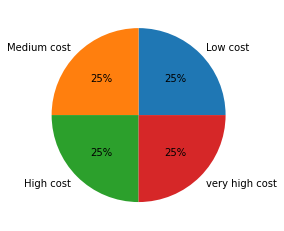

In [15]:
labels = ["Low cost","Medium cost","High cost","very high cost"]
plt.pie(count_df,labels=labels, autopct='%.0f%%')
plt.show()

Total number of mobiles are equally distributed between different price range

In [16]:
price_df=mob_df.groupby('price_range').mean().reset_index().round(3) 
price_df

price_range  battery_power  clock_speed     fc  int_memory  m_dep  \
0           0       1116.902        1.550  4.084      31.174  0.490   
1           1       1228.868        1.489  4.340      32.116  0.524   
2           2       1228.320        1.530  4.498      30.920  0.491   
3           3       1379.984        1.520  4.316      33.976  0.502   

   mobile_wt      pc  px_height  px_width       ram    sc_h   sc_w  talk_time  
0    140.552   9.574    536.408  1150.270   785.314  12.324  5.682     10.612  
1    140.510   9.924    666.892  1251.908  1679.490  12.212  5.544     11.362  
2    143.614  10.018    632.284  1234.046  2582.816  12.010  5.714     10.972  
3    136.320  10.150    744.848  1369.838  3449.232  12.680  6.128     11.098

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


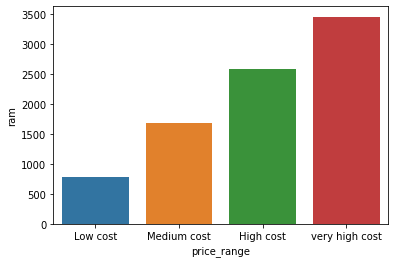

In [17]:
# Average ram for various price range

price_df['price_range'] = price_df.price_range.replace([0,1,2,3],["Low cost","Medium cost","High cost","very high cost"])
sns.barplot('price_range','ram',data=price_df,ci=None )
plt.show()


**Insight:**
1. The above curve shows linear relationship between ram and price range.
2. Higher the ram size, higher will be price range.
3. Lower the ram size, lower will be price range.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


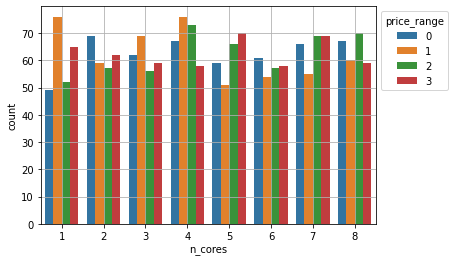

In [18]:
# replacing 0,1,2,3 with "Low cost","Medium cost","High cost","very high cost" 
price_df['price_range'] = price_df.price_range.replace([0,1,2,3],["Low cost","Medium cost","High cost","very high cost"])

# plotting countplot
sns.countplot('n_cores',data=mob_df,hue='price_range')

# setting up legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=10,title='price_range')

# enable the grid
plt.grid()
plt.show()

**Insights:**

* 5 core processor have higher mean price range.
* Most of the very high price range phone having 5 or 7 core processor.
* Most of the low-price range phone having 2 core processor.
* Most of the 1 core processor phone found in medium price range category.


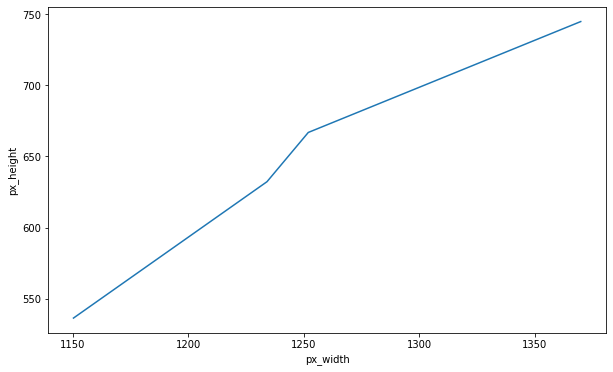

In [19]:
plt.figure(figsize=(10,6))

sns.lineplot(data=price_df, x="px_width", y="px_height")

plt.show()

**Insight:**
1. Pixel height and pixel width shows linear relationship with each other.
2. for higher price range, higher will be pixel height and width.

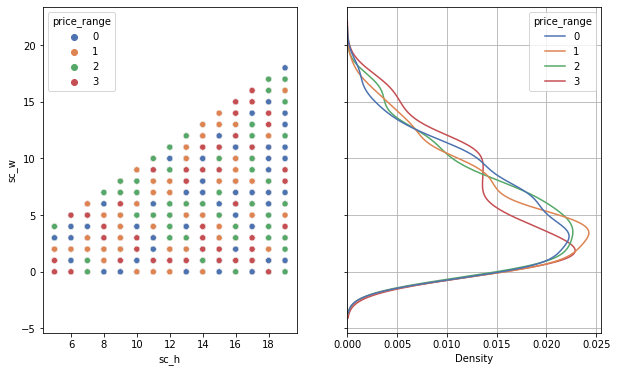

In [20]:
# setting subplot
f, axs = plt.subplots(1,2,
                      figsize=(10,6),
                      sharey=True,)
#plotting scatterplot                   
sns.scatterplot(data=mob_df, x="sc_h", y="sc_w",ax=axs[0],hue="price_range",palette="deep")

# plotting kde plot
sns.kdeplot(data=mob_df, hue="price_range", y="sc_w", ax=axs[1], palette="deep")

# Enable grid
plt.grid()
plt.show()

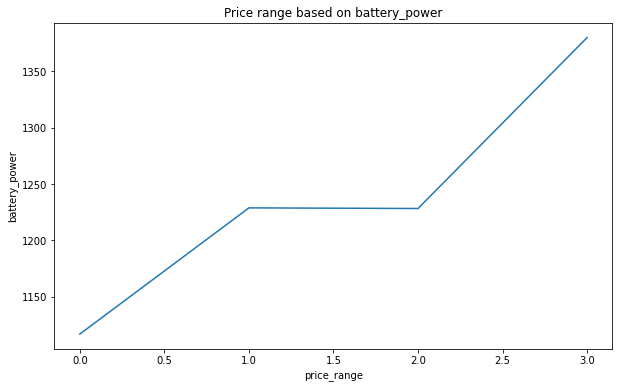

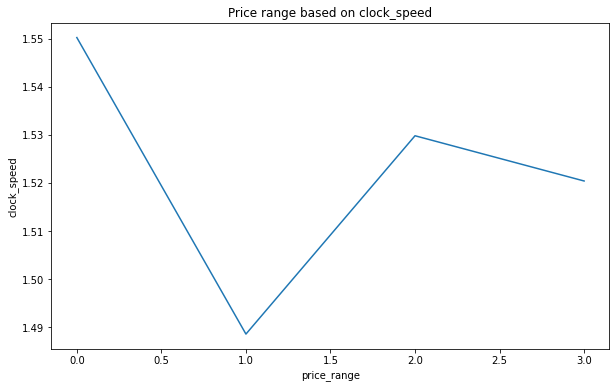

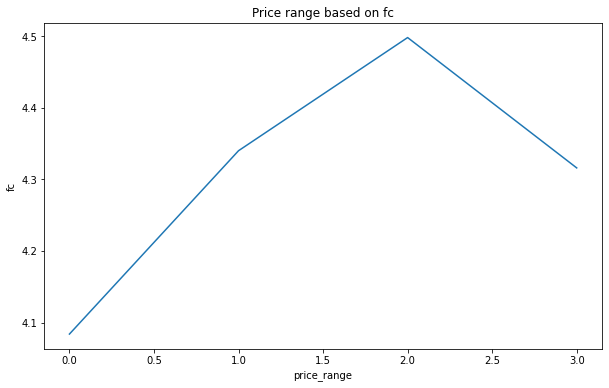

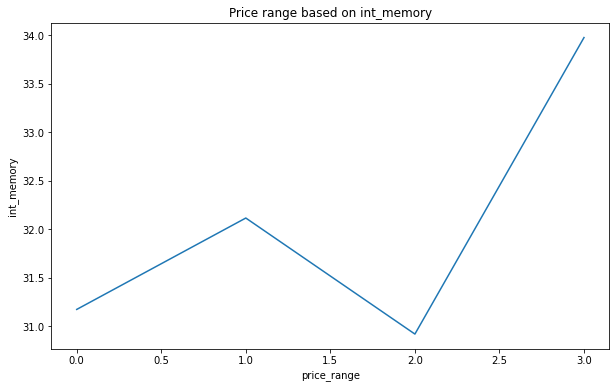

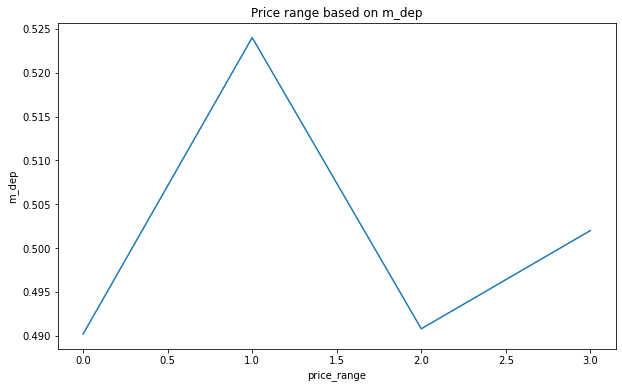

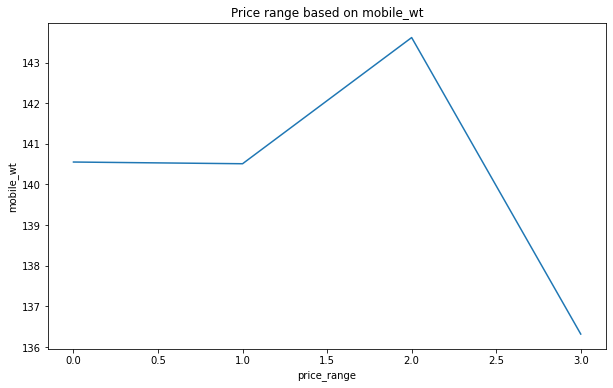

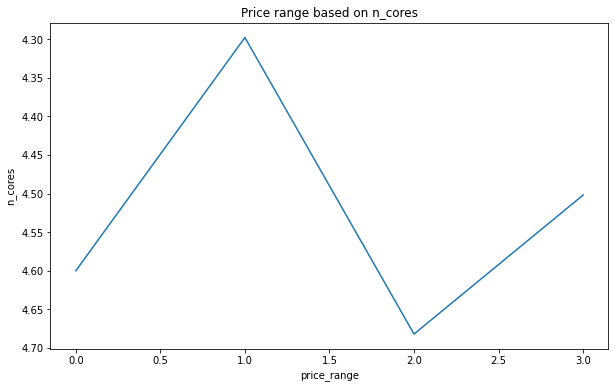

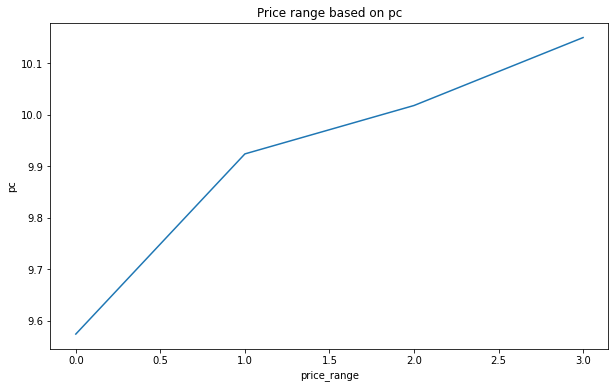

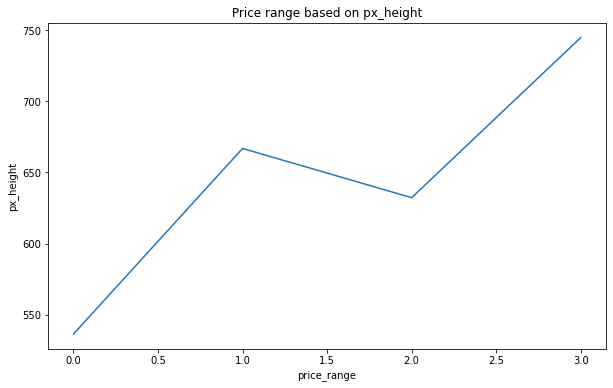

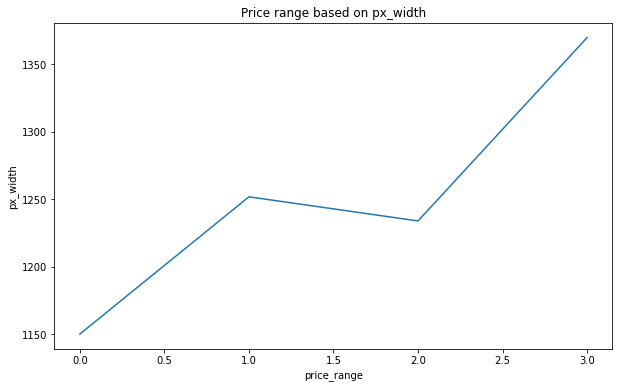

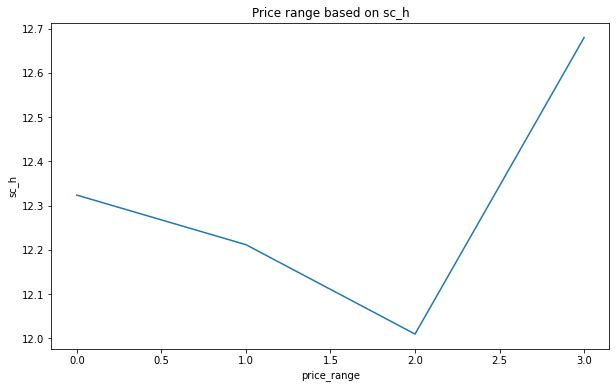

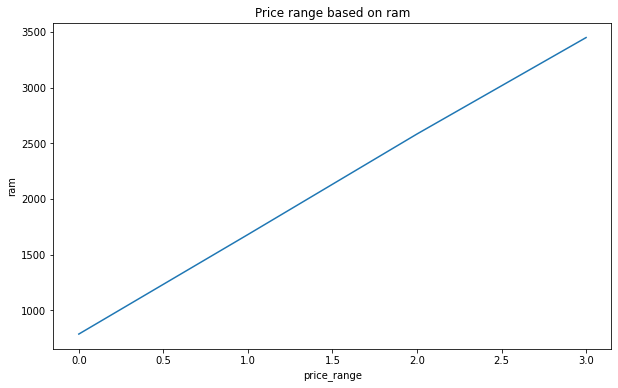

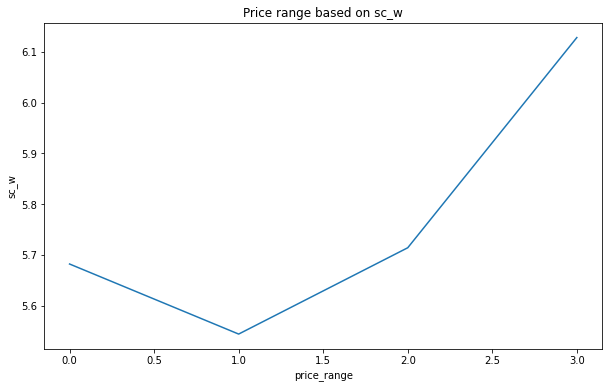

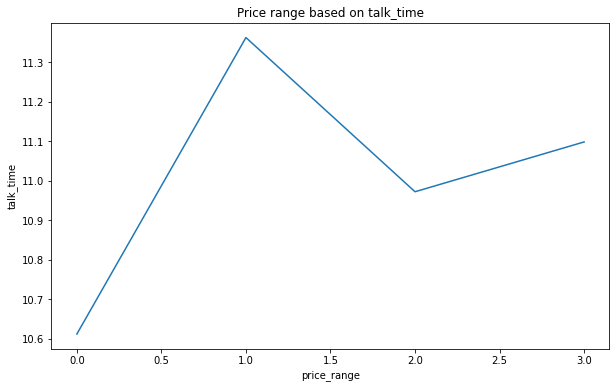

In [21]:
mob_df1=mob_df.copy()
columns=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# plotting boXplot and distribution
counter=1
for column in columns:

    # setting figure size
    plt.figure(figsize=(10,6))

    # setting title
    plt.title('Price range based on ' + column)
    
    # plotting lineplot
    sns.lineplot(x=mob_df1['price_range'],y=mob_df1[column],ci=None)



**Insight:**
1. RAM size and battery power increases linearly with price range.
2. talktime value is maximum for medium price range phone and it is minimum for lower price range phone
3. screen width is minimum for medium price range phone and it is maximum for very high price range phone.
4. very high price range phones are lightest phone and high price range phones are more in weights.

In [22]:
# categorizing numerical and categorical columns
numeric_cols = mob_df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = mob_df.select_dtypes(['object','category']).columns.tolist()

In [23]:
numeric_cols

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [24]:
categorical_cols=categorical_cols[:7]
categorical_cols

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

In [25]:
columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

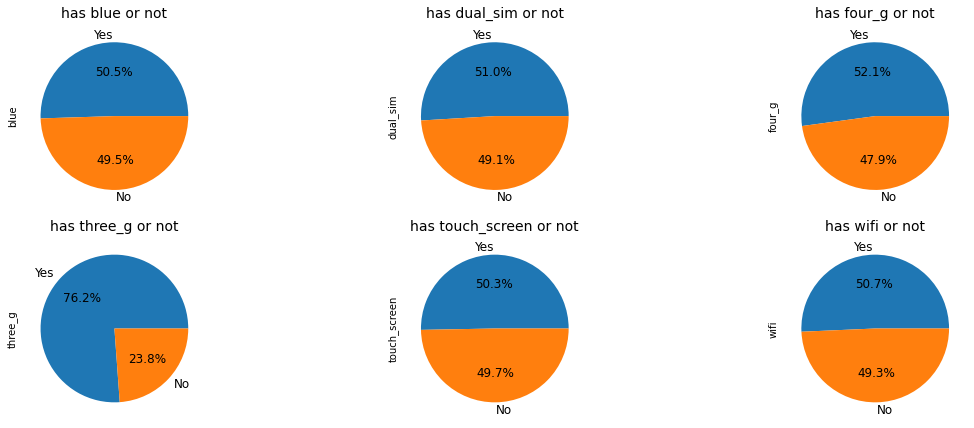

In [26]:
# seiing figure size
plt.figure(figsize=(16,9))

# labeling 0,1 with yes and no
labels=['Yes','No']
count=1   #initializing
for cols in columns:
  plt.subplot(3,3,count)

  #plotting pie chart
  mob_df[cols].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)

  # setting figure title
  plt.title(f'has {cols} or not',fontsize=14)
  plt.tight_layout()
  count=count+1


**Insight:**
1. Almost 50% of mobile given in dataset having bluetooth,dual sim,wifi,4g network compatibility,touch screen
2. 76.2% of mobile given in dataset having 3g network compatibility.


In [27]:
mob_sum=mob_df.groupby('price_range').count()
mob_sum

battery_power  blue  clock_speed  dual_sim   fc  four_g  \
price_range                                                            
0                      500   500          500       500  500     500   
1                      500   500          500       500  500     500   
2                      500   500          500       500  500     500   
3                      500   500          500       500  500     500   

             int_memory  m_dep  mobile_wt  n_cores   pc  px_height  px_width  \
price_range                                                                    
0                   500    500        500      500  500        500       500   
1                   500    500        500      500  500        500       500   
2                   500    500        500      500  500        500       500   
3                   500    500        500      500  500        500       500   

             ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi  
price_range                                                           
0            500   500   500        500      500           500   500  
1            500   500   500        500      500           500   500  
2            500   500   500        500      500           500   500  
3            500   500   500        500      500           500   500

In [28]:

columns

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [29]:
# creating new feature sc_size which is diagonal length of mobile
mob_df['sc_size'] = ((mob_df['sc_h']**2)+(mob_df['sc_w']**2))**0.5

In [30]:
# creating dataframe using groupby mean
mean_df=mob_df.groupby('price_range').mean().reset_index().round(2)
mean_df

price_range  battery_power  clock_speed    fc  int_memory  m_dep  mobile_wt  \
0           0        1116.90         1.55  4.08       31.17   0.49     140.55   
1           1        1228.87         1.49  4.34       32.12   0.52     140.51   
2           2        1228.32         1.53  4.50       30.92   0.49     143.61   
3           3        1379.98         1.52  4.32       33.98   0.50     136.32   

      pc  px_height  px_width      ram   sc_h  sc_w  talk_time  sc_size  
0   9.57     536.41   1150.27   785.31  12.32  5.68      10.61    13.94  
1   9.92     666.89   1251.91  1679.49  12.21  5.54      11.36    13.77  
2  10.02     632.28   1234.05  2582.82  12.01  5.71      10.97    13.67  
3  10.15     744.85   1369.84  3449.23  12.68  6.13      11.10    14.51

Before buying any mobile phone people see following specification of mobile phone in the specification table
1. Price range
2. RAM
3. Battery power
4. Internal memory
5. Clock speed(Processor speed)
6. Mobile weight
7. screen area (size)


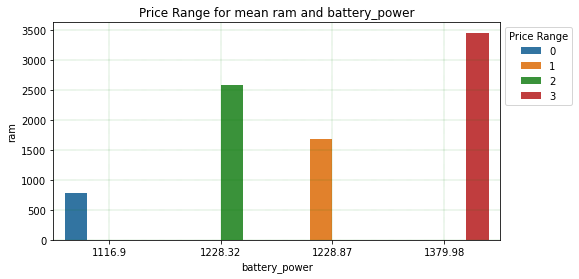

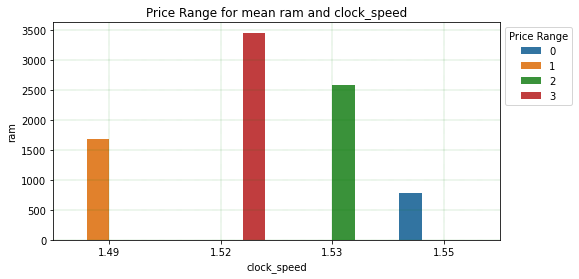

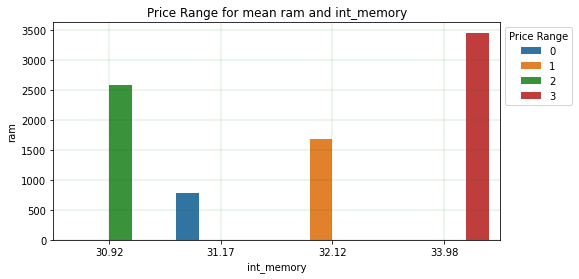

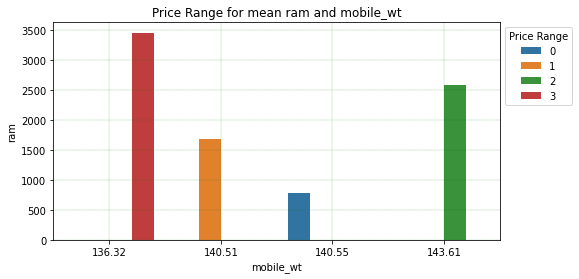

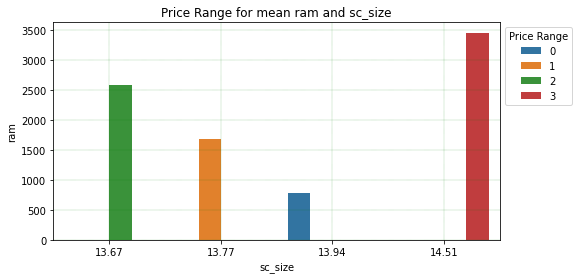

In [31]:
# plotting Price Range for mean ram and other categorical feature
columns=['battery_power','clock_speed','int_memory','mobile_wt','sc_size']
for i in columns:
    # settng figure size
    fig, ax = plt.subplots(figsize=(8,4))

    # plotting barplot
    sns.barplot(x=i, y='ram', data=mean_df,hue='price_range')

    # setting title
    plt.title('Price Range for mean ram and '+i)

    # adjusting index location
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title='Price Range')

    # enabling grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()


**Insight:**

*Very high price range mobile*
1. It has average RAM size less than 3500 MB.
2. It has high battery power.
3. It has high internal memory.
4. It is lighter in weight(around 137gm).
5. It has moderate clock speed.
6. Larger screen size.

*Low price range mobile*
1. It has average RAM size close to 750 MB.
2. It has low battery power (around 1000 mAh).
3. It has high internal memory.
4. It is moderate weight.
5. It has high clock speed.
6. Moderate screen size.


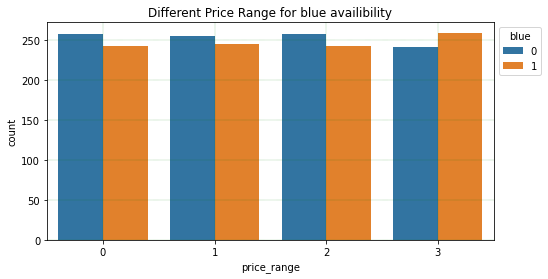

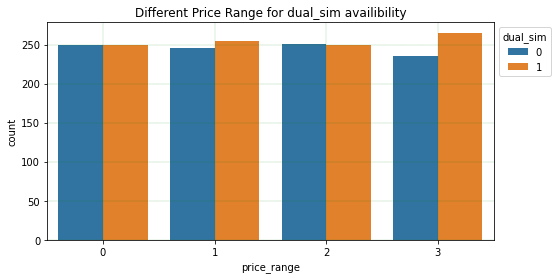

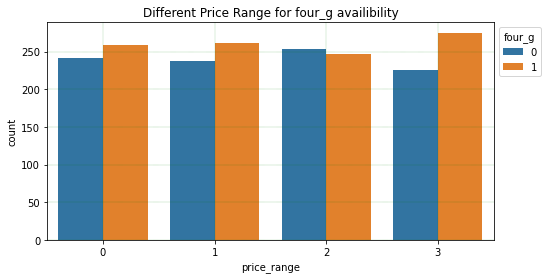

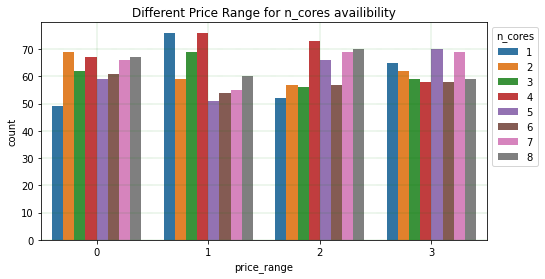

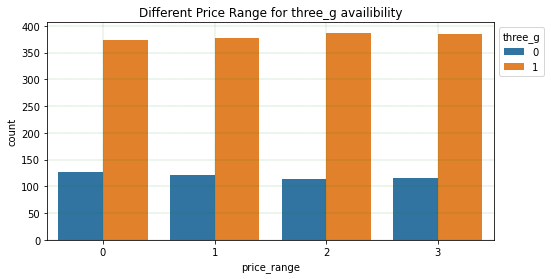

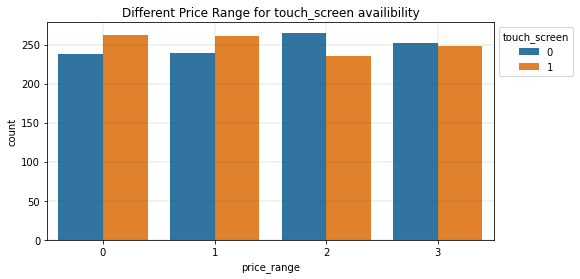

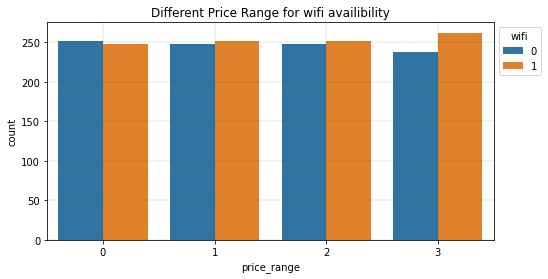

In [32]:
# plotting Price Range for various categorical feature
for i in categorical_cols:
    # setting figure size
    fig, ax = plt.subplots(figsize=(8,4))

    # plotting the required plot
    sns.countplot(data=mob_df, x='price_range', hue=i)

    # setting title 
    plt.title('Different Price Range for ' +i+ ' availibility')

    # adjusting legend location
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)

    # enable the grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()

**Insight:**
1. Low and moderate price range phone having touch screen feature,most of the high price range phone have not touchscreen.
2. 3g and 4g phone is more popular among each price range.
3. In lower price range phone, most of the phone donot have wifi feature.
4. Most of the Higher price range phone having dual sim compatibility.
5. bluetooth in high price range phone is more popular.


In [33]:
mob_df

battery_power blue  clock_speed dual_sim  fc four_g  int_memory  m_dep  \
0               842    0          2.2        0   1      0           7    0.6   
1              1021    1          0.5        1   0      1          53    0.7   
2               563    1          0.5        1   2      1          41    0.9   
3               615    1          2.5        0   0      0          10    0.8   
4              1821    1          1.2        0  13      1          44    0.6   
...             ...  ...          ...      ...  ..    ...         ...    ...   
1995            794    1          0.5        1   0      1           2    0.8   
1996           1965    1          2.6        1   0      0          39    0.2   
1997           1911    0          0.9        1   1      1          36    0.7   
1998           1512    0          0.9        0   4      1          46    0.1   
1999            510    1          2.0        1   5      1          45    0.9   

      mobile_wt n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0           188       2   2         20       756  2549     9     7         19   
1           136       3   6        905      1988  2631    17     3          7   
2           145       5   6       1263      1716  2603    11     2          9   
3           131       6   9       1216      1786  2769    16     8         11   
4           141       2  14       1208      1212  1411     8     2         15   
...         ...     ...  ..        ...       ...   ...   ...   ...        ...   
1995        106       6  14       1222      1890   668    13     4         19   
1996        187       4   3        915      1965  2032    11    10         16   
1997        108       8   3        868      1632  3057     9     1          5   
1998        145       5   5        336       670   869    18    10         19   
1999        168       6  16        483       754  3919    19     4          2   

     three_g touch_screen wifi price_range    sc_size  
0          0            0    1           1  11.401754  
1          1            1    0           2  17.262677  
2          1            1    0           2  11.180340  
3          1            0    0           2  17.888544  
4          1            1    0           1   8.246211  
...      ...          ...  ...         ...        ...  
1995       1            1    0           0  13.601471  
1996       1            1    1           2  14.866069  
1997       1            1    0           3   9.055385  
1998       1            1    1           0  20.591260  
1999       1            1    1           3  19.416488  

[2000 rows x 22 columns]

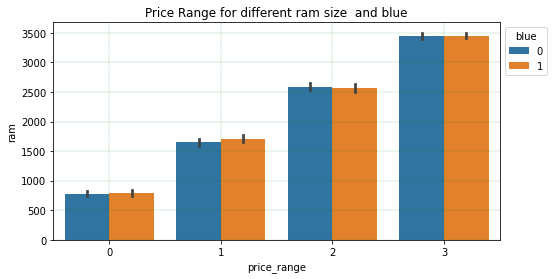

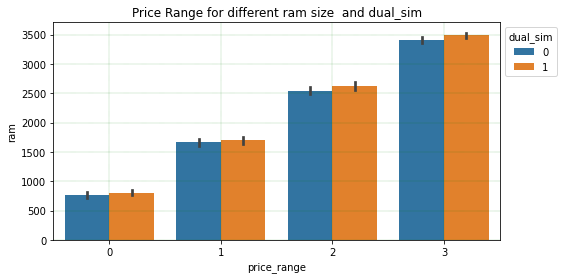

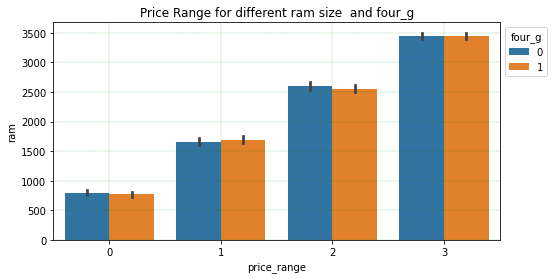

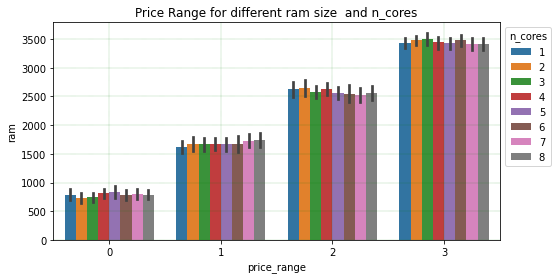

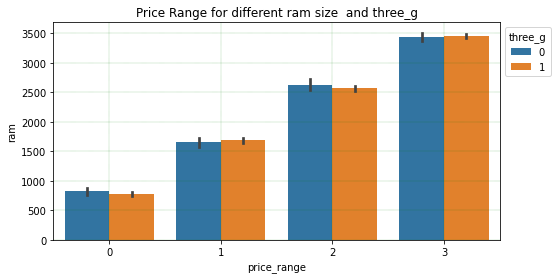

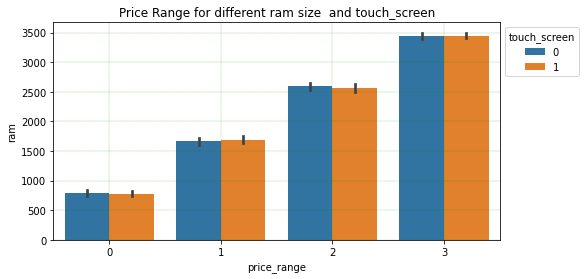

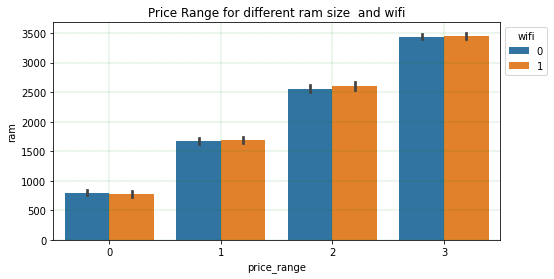

In [34]:
# plotting Price Range for various RAM size and categorical feature
for i in categorical_cols:

    # setting figure size
    fig, ax = plt.subplots(figsize=(8,4))
   
    # plotting the required plot
    sns.barplot(data=mob_df, x='price_range',y='ram',hue=i)

    # setting title 
    plt.title('Price Range for different ' +'ram size '+ ' and ' +i)

    # adjusting legend location
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)

    # enable the grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()


**Insights:**

* RAM size varies linearly with price range.
* Very high price range phone has 3 core processor and 3500 MB RAM.


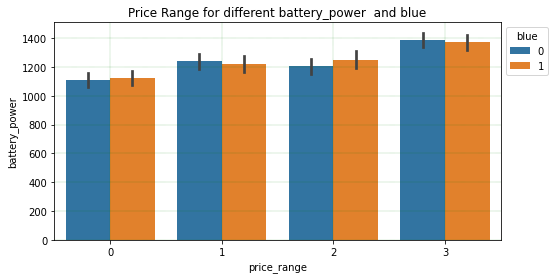

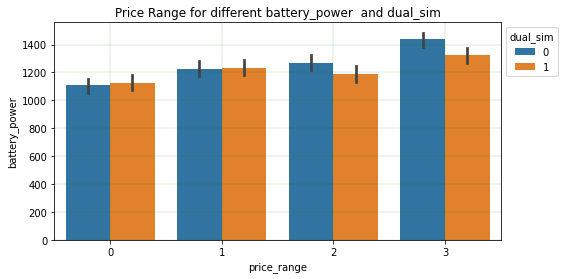

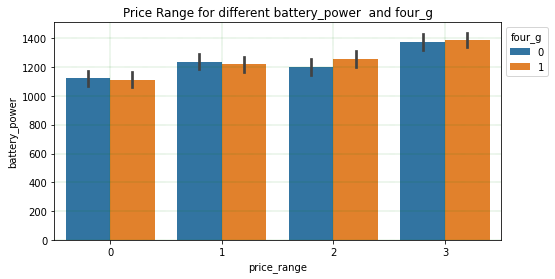

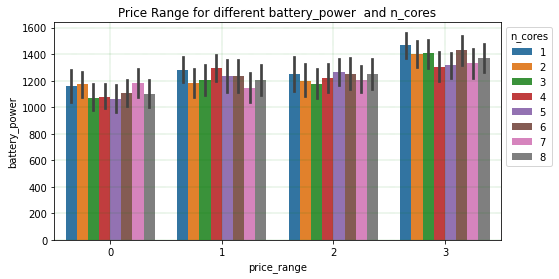

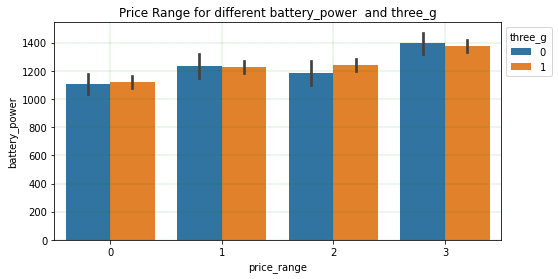

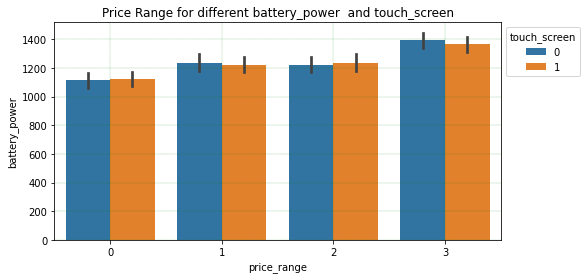

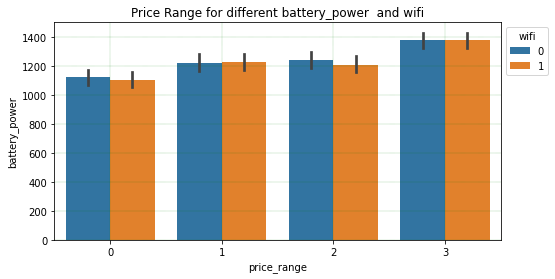

In [35]:
# plotting Price Range for various battery power and categorical feature
for i in categorical_cols:
    # setting figure size
    fig, ax = plt.subplots(figsize=(8,4))
   
    # plotting the required plot
    sns.barplot(data=mob_df, x='price_range',y='battery_power',hue=i)

    # setting title 
    plt.title('Price Range for different ' +'battery_power '+ ' and ' +i)

    # adjusting legend location
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)

    # enable the grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()

**Insight:**
1. Battery power varies linearly with price range.
2. Single sim mobile phone is more popular in high and very high price range phone.


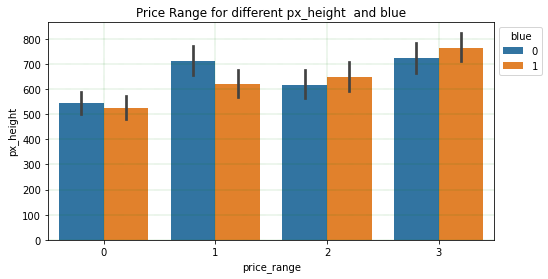

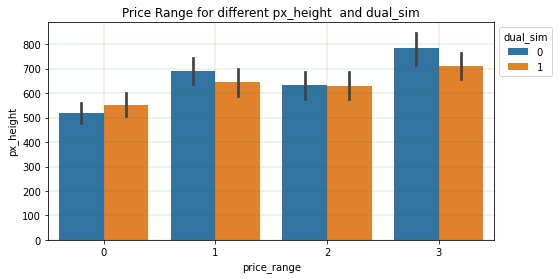

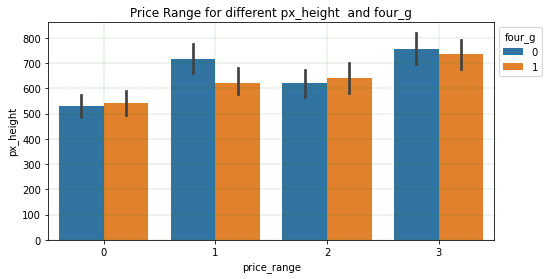

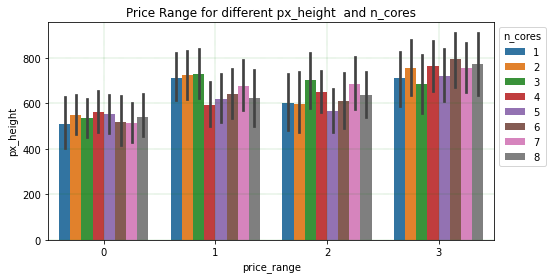

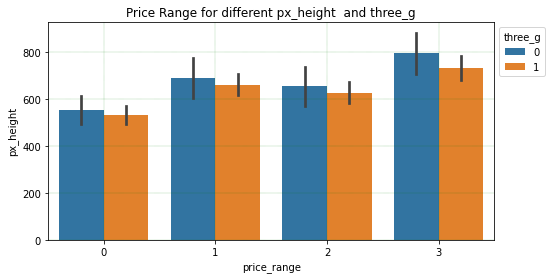

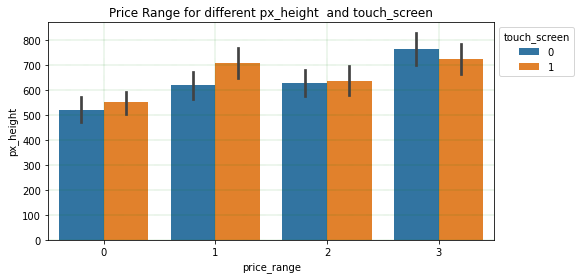

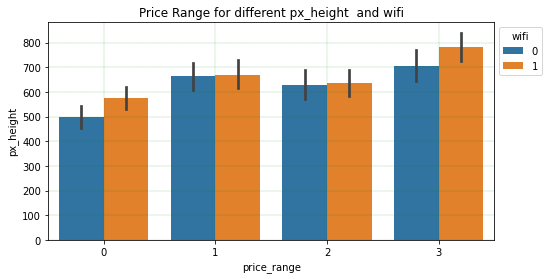

In [36]:
# plotting Price Range for various pixel height and categorical feature
for i in categorical_cols:
    # setting figure size
    fig, ax = plt.subplots(figsize=(8,4))
   
    # plotting the required plot
    sns.barplot(data=mob_df, x='price_range',y='px_height',hue=i)

    # setting title 
    plt.title('Price Range for different ' +'px_height '+ ' and ' +i)

    # adjusting legend location 
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)

    # enable the grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()

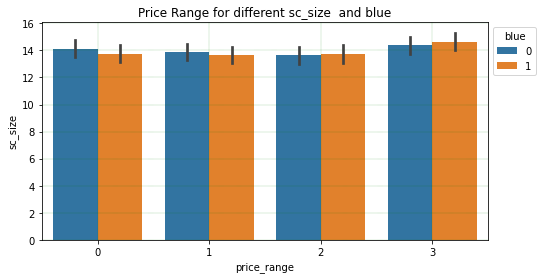

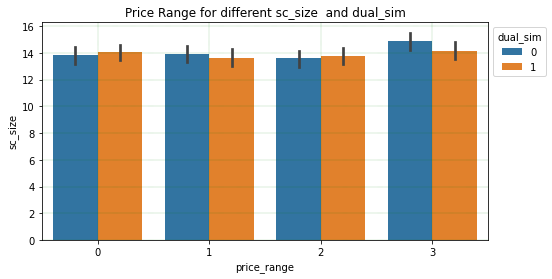

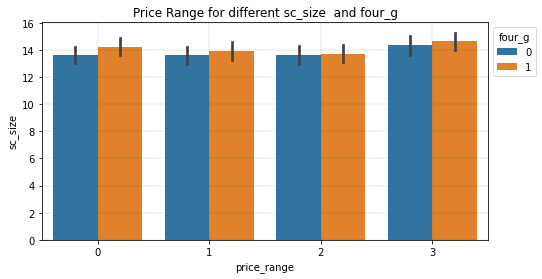

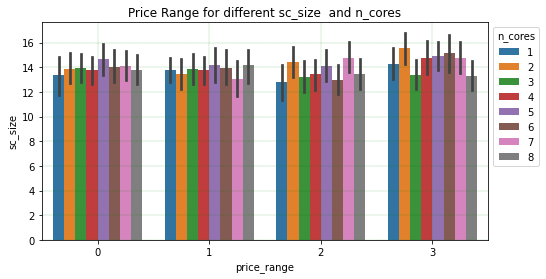

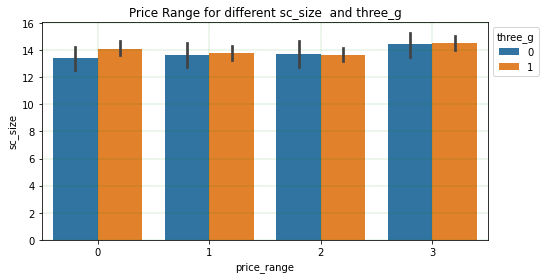

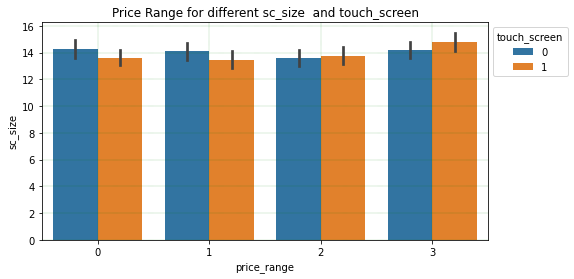

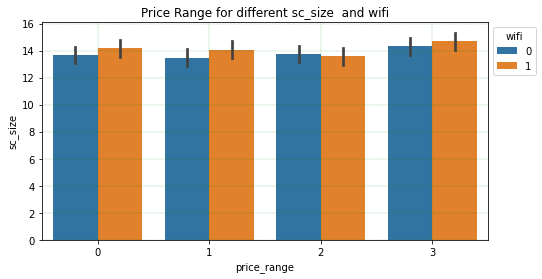

In [37]:
# plotting Price Range for various Screen size and categorical feature
for i in categorical_cols:
    # setting figure size 
    fig, ax = plt.subplots(figsize=(8,4))
   
    # plotting the required plot
    sns.barplot(data=mob_df, x='price_range',y='sc_size',hue=i)

    # setting title 
    plt.title('Price Range for different ' +'sc_size '+ ' and ' +i)

    # adjusting legend location
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left',title=i)

    # enable the grid
    ax.grid(color = 'green', linestyle = '--', linewidth = 0.2)
    plt.show()

In [38]:
# now count the how many data having Px_height (Pixel Resolution Height) zero
print(mob_df[mob_df['px_height']==0].shape[0])

2


In [39]:
# Px_height (Pixel Resolution Height) zero in only two columns, hence we will drop that columns
mob_df=mob_df[mob_df['px_height']!=0]

In [40]:
# Now count the how many data having Sc_w (Screen Width of mobile in cm) zero
print(mob_df[mob_df['sc_w']==0].shape[0])

179


In [41]:
# Replacing 0 with NaN in Sc_w (Screen Width of mobile in cm) columns
mob_df['sc_w']=mob_df['sc_w'].replace(0,np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  1998 non-null   int64   
 1   blue           1998 non-null   category
 2   clock_speed    1998 non-null   float64 
 3   dual_sim       1998 non-null   category
 4   fc             1998 non-null   int64   
 5   four_g         1998 non-null   category
 6   int_memory     1998 non-null   int64   
 7   m_dep          1998 non-null   float64 
 8   mobile_wt      1998 non-null   int64   
 9   n_cores        1998 non-null   category
 10  pc             1998 non-null   int64   
 11  px_height      1998 non-null   int64   
 12  px_width       1998 non-null   int64   
 13  ram            1998 non-null   int64   
 14  sc_h           1998 non-null   int64   
 15  sc_w           1819 non-null   float64 
 16  talk_time      1998 non-null   int64   
 17  three_g        1998 non-null   ca

After removing 0 with NaN in Sc_w (Screen Width of mobile in cm) columns we get null value in Sc_w columns.

In [43]:
# using KNN imputer to fill the NaN value
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=1)
mob_df=pd.DataFrame(knn_imp.fit_transform(mob_df),columns=mob_df.columns)


In [44]:
mob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [45]:
# checking for missing value and sorting null items
mob_df.isnull().sum().sort_values(ascending=False)

battery_power    0
blue             0
price_range      0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
pc               0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
sc_size          0
dtype: int64

In [46]:
# importing required library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Mobiles have only 3G specifications.
onlythree_g=mob_df[(mob_df['three_g']==1) & (mob_df['four_g']!=1)].shape[0]
percent_3g=round((onlythree_g/mob_df.shape[0])*100,3)

# Mobiles have only 4G specifications.
onlyfour_g=mob_df[(mob_df['three_g']!=1) & (mob_df['four_g']==1)].shape[0]
percent_4g=round((onlyfour_g/mob_df.shape[0])*100,3)

# Mobiles have both 3G and 4G specifications.
both3g_4g=mob_df[(mob_df['three_g']==1) & (mob_df['four_g']==1)].shape[0]
percent_3g4g=round((both3g_4g/mob_df.shape[0])*100,3)

# Mobiles have no 3G and no 4G specifications.
no3g_4g=mob_df[(mob_df['three_g']!=1) & (mob_df['four_g']!=1)].shape[0]
percent_no3g4g=round((no3g_4g/mob_df.shape[0])*100,3)


In [47]:
percent_3g

24.024

In [48]:
dict_network={
    'Network':['only 4g','only3g','3g and 4g','No 3g and No 4g'],
    'Counts':[onlyfour_g, onlythree_g, both3g_4g, no3g_4g ],
    'Percentage':[percent_4g, percent_3g, percent_3g4g, percent_no3g4g]
}

# creating Network and Counts dataframe using dictionary
network=pd.DataFrame(dict_network)
network

Network  Counts  Percentage
0          only 4g       0       0.000
1           only3g     480      24.024
2        3g and 4g    1041      52.102
3  No 3g and No 4g     477      23.874

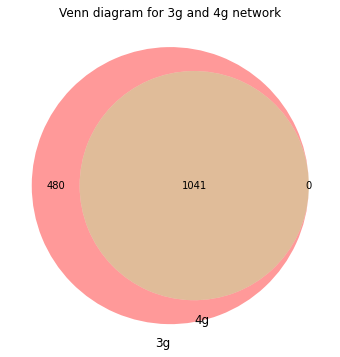

In [49]:
# plotting Venn diagram for varous network compatibility

# setting figure size 
plt.figure(figsize=(10,6))

# Venn diagram for 3g and 4g data
venn2(subsets = (onlythree_g, onlyfour_g, both3g_4g), set_labels = ('3g', '4g'))

# setting title 
plt.title('Venn diagram for 3g and 4g network')

plt.show()

**Insights:**

1. mobile which have 4g network compatibility also have 3g network compatibility.
2. 480 phone have only 3g features.
3. 477 phone have neither 3g nor 4g network compatibility.

In [50]:
num_columns=(mob_df.describe()).columns

In [51]:
print(num_columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_size'],
      dtype='object')


## Outlier

**Check for outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

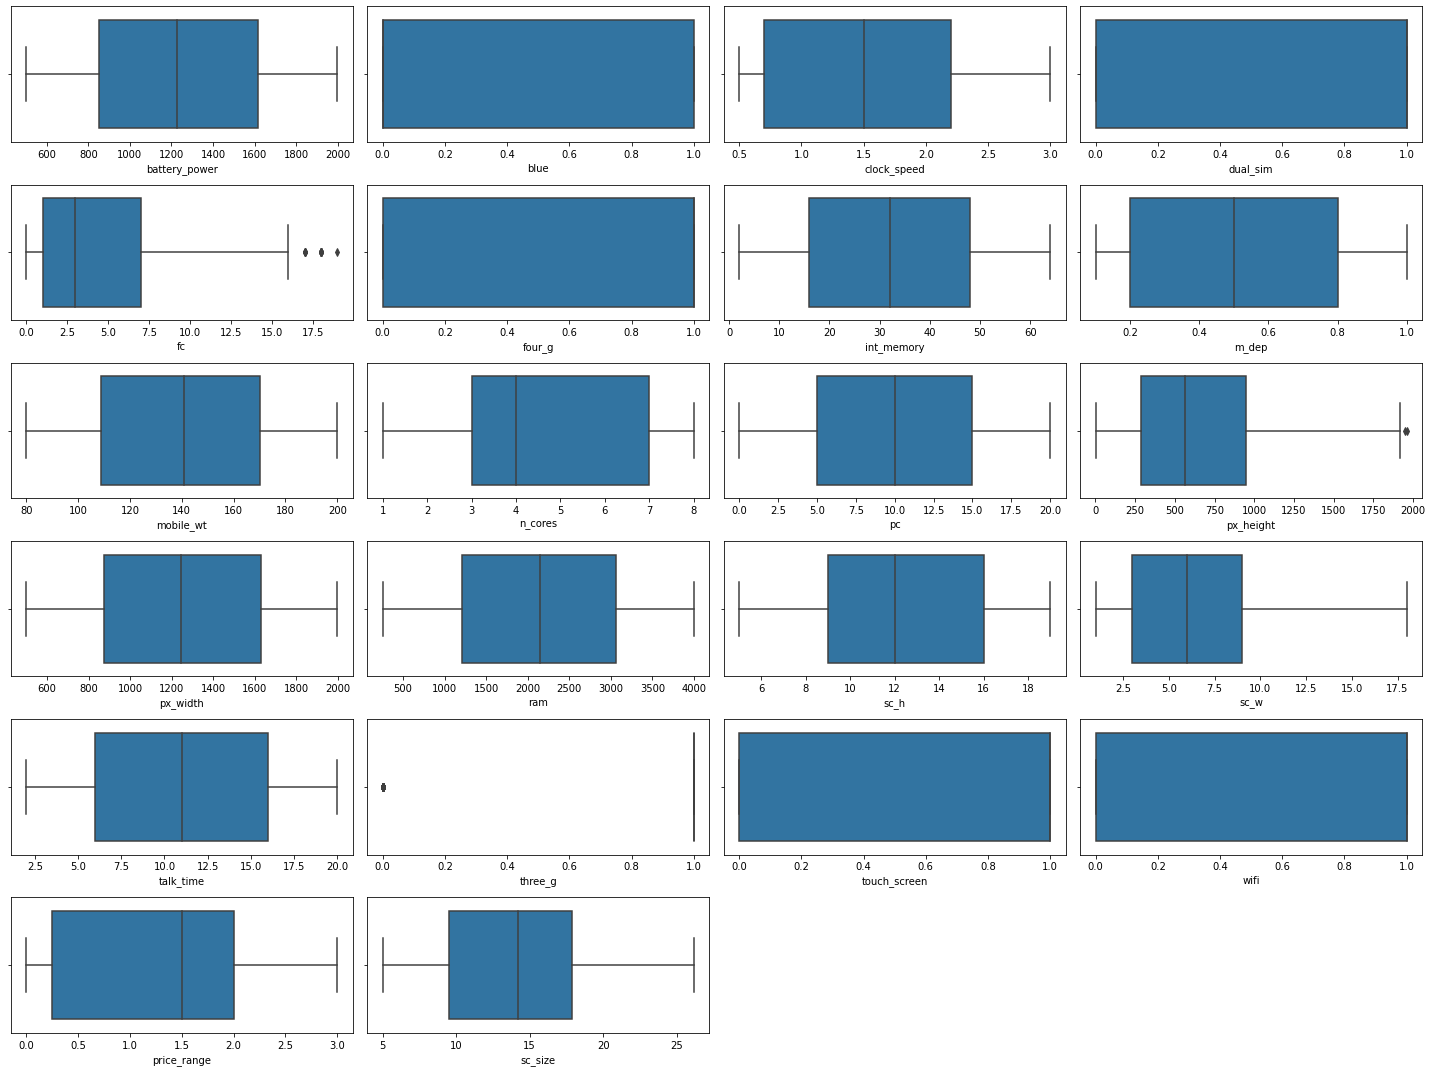

In [52]:
# plotting boxplot for numerical columns
n = 1     # initializing
plt.figure(figsize=(20,15))   # setting figure size
for column in num_columns:
    plt.subplot(6,4,n)       # 6 rows , 4 columns
    n = n+1
    sns.boxplot(mob_df[column])
    plt.tight_layout()
plt.show()

**Insight:**
1. Outlier in fc and px_height columns



In [53]:
# previewing maximum and minimum threshold values
min_thresold, max_thresold = mob_df.fc.quantile([0.001, 0.999])
min_thresold, max_thresold

(0.0, 18.0)

In [54]:
mob_df[mob_df.fc < min_thresold].shape[0]

0

**Insights:**

there is no data below minimum threshold values

In [55]:
mob_df[mob_df.fc > max_thresold]

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
1704         1290.0   1.0          1.4       1.0  19.0     1.0        35.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width    ram  sc_h  sc_w  \
1704    0.3      110.0      4.0  20.0      405.0     742.0  879.0  16.0   2.0   

      talk_time  three_g  touch_screen  wifi  price_range    sc_size  
1704        8.0      1.0           0.0   0.0          0.0  16.124515

**Insight:**

We found that:

Only one row found as an outlier in data in Front Camera mega pixels(fc) 

In [56]:
# selecting only those data in fc columns which have less than maximum threshold value
mob_df = mob_df[(mob_df['fc'] <= max_thresold)]

In [57]:
# getting minimum and maximum threshold values
min_thresold, max_thresold = mob_df.px_height.quantile([0.001, 0.999])
min_thresold, max_thresold

(2.996, 1920.1160000000039)

In [58]:
# dataframe more than maximum threshold values
mob_df[mob_df.px_height > max_thresold]

battery_power  blue  clock_speed  dual_sim   fc  four_g  int_memory  \
988          1413.0   1.0          0.5       1.0  4.0     1.0        45.0   
1770         1230.0   1.0          1.6       0.0  0.0     1.0        48.0   

      m_dep  mobile_wt  n_cores   pc  px_height  px_width     ram  sc_h  sc_w  \
988     0.4      104.0      5.0  6.0     1949.0    1994.0  2973.0  17.0   8.0   
1770    0.7      111.0      7.0  2.0     1960.0    1963.0  1622.0  18.0  17.0   

      talk_time  three_g  touch_screen  wifi  price_range    sc_size  
988        15.0      1.0           0.0   1.0          3.0  18.788294  
1770       16.0      1.0           1.0   1.0          2.0  24.758837

**Insight:**

We found that:

Two rows row found as an outlier in data in Pixel Resolution Height (Px_height).



In [59]:
# selecting only those data which have less than maximum threshold value
mob_df = mob_df[(mob_df['px_height'] <= max_thresold)]

In [60]:
# check for outlier for fc columns
mob_df[mob_df.fc > max_thresold].shape[0]

0

**Insights:**

There is no outlier in **fc** columns

In [61]:
# check for outlier for px_height columns
mob_df[mob_df.px_height > max_thresold].shape[0]

0

**Insights:**

There is no outlier in **px_height** columns

**Insights:**

Outlier is removed from **fc** and **px_height** columns.

In [62]:

count_df=mob_df.price_range.agg(["value_counts"]).sort_index()
count_df

value_counts
0.0           499
1.0           499
2.0           499
3.0           498

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


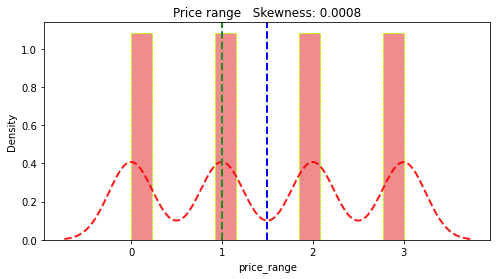

In [63]:
# setting figure size
plt.figure(figsize=(8,4))
sns.distplot(mob_df['price_range'],
               hist_kws = {'color':'lightcoral', 'edgecolor':'#aaff00',
                       'linewidth':1, 'linestyle':'--', 'alpha':0.9},  
               kde_kws = {'color':'red', 
                       'linewidth':2, 'linestyle':'--', 'alpha':0.9})
plt.axvline(mob_df['price_range'].mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(mob_df['price_range'].median(), color='forestgreen', linestyle='dashed', linewidth=2)

# finding skewness
skewness=round(mob_df['price_range'].skew(),4)

#setting title of plot
plt.title('Price range   Skewness: '+ str(skewness))
plt.show()

**Insights:**

As skewness value close to zero, data is normally distributed.

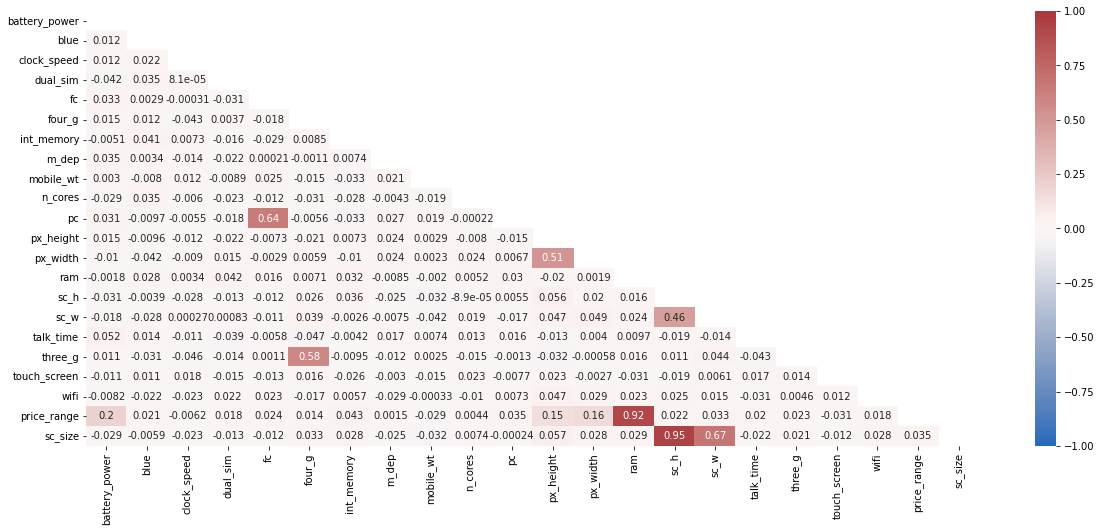

In [65]:
# setting figure size
plt.figure(figsize=(20,8))

# plotting correlation plot for different feature in dataframe
corr= mob_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

plt.show()

**Insight:**

1. Ram shows high correlation with price range.
2. px width and px height shows almost same correlation with price range.
3. battery power shows good correlation with price range.
4. primary camera is highly correlated with front camera.
5. three_g and four_g are highly correlated.
6. screen height and screen width are highly correlated.
7. Screen size is highly correlated with **sc_h** (screen height).

we know that,

sc_size=sqrt(sc_w^2+sc_h^2)

these three columns are highly correlated,

we can remove either **sc_w** or **sc_h** columns
As, **sc_h** is highly correlated with **sc_size**. hence, we will remove **sc_h** columns.

In [66]:
# dropping sc_h columns
mob_df=mob_df.drop(['sc_h'], axis=1)

In [67]:
mob_df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0          842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1         1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2          563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3          615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4         1821.0   1.0          1.2       0.0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_w  \
0    0.6      188.0      2.0   2.0       20.0     756.0  2549.0   7.0   
1    0.7      136.0      3.0   6.0      905.0    1988.0  2631.0   3.0   
2    0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0   2.0   
3    0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0   8.0   
4    0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range    sc_size  
0       19.0      0.0           0.0   1.0          1.0  11.401754  
1        7.0      1.0           1.0   0.0          2.0  17.262677  
2        9.0      1.0           1.0   0.0          2.0  11.180340  
3       11.0      1.0           0.0   0.0          2.0  17.888544  
4       15.0      1.0           1.0   0.0          1.0   8.246211

In [68]:
# Separating X variables(indpendent variables) and Y(target variable) variable.
X=mob_df.drop('price_range',axis=1)
y=mob_df["price_range"]

In [69]:
# importing important library from sklearn to find the most important feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Now we Will select the  most important features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)

# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


# Check dataframe
featureScores.sort_values('Score',ascending=False)

Specs          Score
13            ram  929630.589741
11      px_height   17246.171045
0   battery_power   14006.233513
12       px_width    9507.819461
8       mobile_wt      93.420951
6      int_memory      89.136340
19        sc_size      15.179012
15      talk_time      13.219955
4              fc      12.198509
10             pc      10.238653
9         n_cores       9.310115
14           sc_w       9.306565
17   touch_screen       2.005741
5          four_g       1.477635
1            blue       0.773785
7           m_dep       0.739354
2     clock_speed       0.674058
3        dual_sim       0.633278
18           wifi       0.404739
16        three_g       0.323405

In [70]:
# top 15 features with highest chi squared statistic 
mob_df_imp=featureScores.nlargest(15,'Score')
X_feature=mob_df_imp['Specs'].values
print(X_feature)

['ram' 'px_height' 'battery_power' 'px_width' 'mobile_wt' 'int_memory'
 'sc_size' 'talk_time' 'fc' 'pc' 'n_cores' 'sc_w' 'touch_screen' 'four_g'
 'blue']


In [71]:
# 15 features with highest chi squared statistic are selected as independent variables.
X=mob_df[X_feature]

# dependent varaible
y=mob_df['price_range']

In [72]:
# creating train test split with test size is 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1396, 15)
(599, 15)
(1396,)
(599,)


In [74]:
pip install simple-colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from simple_colors import *

**Creating function for accuracy score, Confusion matrix, classificaton report and ROC curve**

In [76]:
def report(model,X_train,y_train,X_test,y_test):
  
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  # importing library
  from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc

  # Accuracy score for train set
  report.train_accuracy=accuracy_score(y_train,y_train_pred)

  # Accuracy score for test set.
  report.test_accuracy=accuracy_score(y_test,y_test_pred)

  # display accuracy score of test and train data
  print(red("\n\n\n Accuracy score for train set and test set:\n",['bold', 'underlined']))
  print('Train Set Accuracy:',report.train_accuracy)
  print('Test Set Accuracy:',report.test_accuracy)

  # plotting confusion matrix
  print(red("\n\n\n plotting confusion matrix for test set:\n",['bold', 'underlined']))
  plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Reds, display_labels=['low cost','medium cost', 'high cost', 'very high cost'],xticks_rotation='vertical')
  plt.title('Confusion Matrix-testset',fontsize=15)
  plt.show()
  # printing classification report for train data
  print(red("\n\n\n The classifiaction report of train set:\n",['bold', 'underlined']))
  print(classification_report(y_train,y_train_pred))

  # printing classification report for test data
  print(red("\n\n\n The classifiaction report of test set:\n",['bold', 'underlined']))
  print(classification_report(y_test,y_test_pred))
 
  # plotting ROC Curve
  fpr = {}
  tpr = {}
  thresh ={}
  n_class = 4
  pred_prob = model.predict_proba(X_test)
  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
 
  print(red("\n\n\n ROC Curve :\n",['bold', 'underlined']))        
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.plot([0, 1], [0, 1], linestyle='-.')
  
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')

# Predictive modelling

**Importing library**

In [77]:
# importing library
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


**Scaling the data**

In [78]:
# Scaling the data
# creating an object of StandardScaler
stdscaler=StandardScaler()
X_train_scaled=stdscaler.fit_transform(X_train)  
X_test_scaled=stdscaler.transform(X_test)   

## K-nearest Neighbour classifier

In [79]:
# creating an object of the KNN classifier
knn=KNeighborsClassifier()

# train the model
knn.fit(X_train_scaled,y_train) 

KNeighborsClassifier()




 Accuracy score for train set and test set:

Train Set Accuracy: 0.7313753581661891
Test Set Accuracy: 0.5592654424040067



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


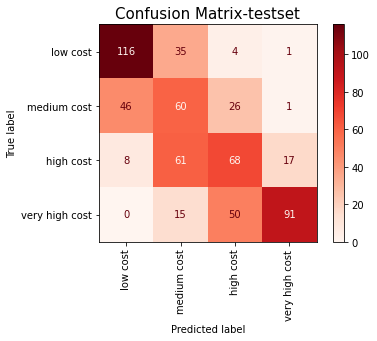




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       343
         1.0       0.62      0.69      0.65       366
         2.0       0.69      0.64      0.66       345
         3.0       0.90      0.74      0.81       342

    accuracy                           0.73      1396
   macro avg       0.74      0.73      0.73      1396
weighted avg       0.74      0.73      0.73      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       156
         1.0       0.35      0.45      0.39       133
         2.0       0.46      0.44      0.45       154
         3.0       0.83      0.58      0.68       156

    accuracy                           0.56       599
   macro avg       0.58      0.55      0.56       599
weighted avg       0.59      0.56      0.57       599




 ROC Curve :



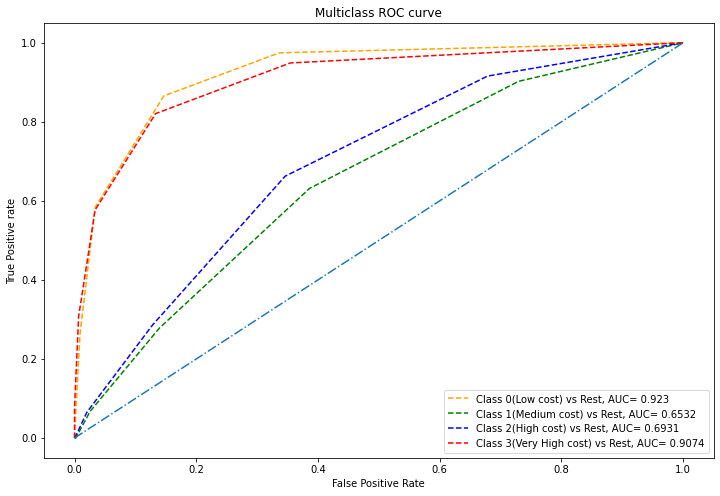

In [80]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=knn,X_train=X_train_scaled,y_train=y_train,X_test=X_test_scaled,y_test=y_test)

In [81]:

  print('Train Set Accuracy:',report.train_accuracy)
  print('Test Set Accuracy:',report.test_accuracy)

Train Set Accuracy: 0.7313753581661891
Test Set Accuracy: 0.5592654424040067


In [82]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'KNN classifier ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=pd.DataFrame(accuracy_dict,index=[1])

In [83]:
accuracy_df

Model  train Accuracy Score  test Accuracy Score
1  KNN classifier                  0.731                0.559

**Insights:**
1. Training accuracy is 0.73 and test accuracy is 0.559 indicate that model is not able to given data very well. hence, we have to try some other complex algorithm.
2. Training accuracy is more than test accuracy, difference between them is very large, hence it is a case of overfitting.
3. From ROC curve, medium and high cost phone perform very poor with this data, as AUC close to 0.5.
4. Average F1-score for test data 0.56, which is also perform poor with this given data.

### K-nearest Neighbour classifier with GridSearchCV

In [84]:
# parameter grid for GridSearchCv
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41],
               'algorithm':['ball_tree','kd_tree','brute'],
               'leaf_size':[4,6,8,10],
               'metric':['euclidean','manhattan','minkowski']}

In [85]:
# Hyperparameter tuning with the GridSearhCV
knn_opt=GridSearchCV(knn,
                      cv=5,scoring='accuracy',
                      verbose=3,
                      param_grid=param_grid, n_jobs=-1)

# train the model
knn_opt.fit(X_train_scaled ,y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [4, 6, 8, 10],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39,
                                         41]},
             scoring='accuracy', verbose=3)

In [86]:
# getting best parameter
knn_opt.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 4,
 'metric': 'manhattan',
 'n_neighbors': 41}




 Accuracy score for train set and test set:

Train Set Accuracy: 0.7757879656160458
Test Set Accuracy: 0.7345575959933222



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


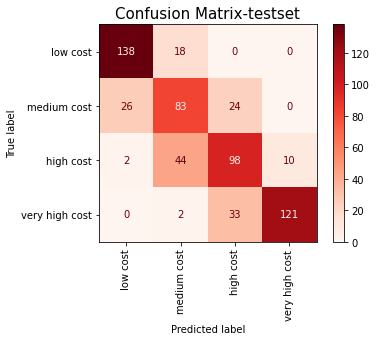




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       343
         1.0       0.70      0.70      0.70       366
         2.0       0.69      0.73      0.71       345
         3.0       0.92      0.80      0.85       342

    accuracy                           0.78      1396
   macro avg       0.78      0.78      0.78      1396
weighted avg       0.78      0.78      0.78      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       156
         1.0       0.56      0.62      0.59       133
         2.0       0.63      0.64      0.63       154
         3.0       0.92      0.78      0.84       156

    accuracy                           0.73       599
   macro avg       0.74      0.73      0.73       599
weighted avg       0.74      0.73      0.74       599




 ROC Curve :



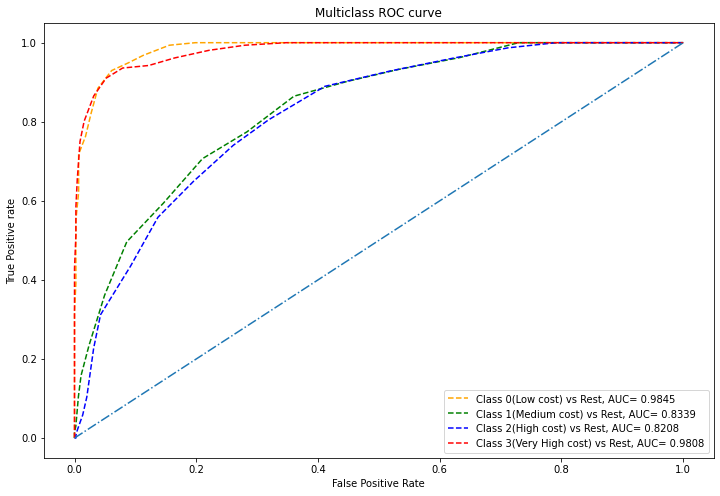

In [87]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=knn_opt,X_train=X_train_scaled,y_train=y_train,X_test=X_test_scaled,y_test=y_test)

In [88]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'KNN classifier with GridSearchCv ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                    KNN classifier                  0.731   
1  KNN classifier with GridSearchCv                  0.776   

   test Accuracy Score  
0                0.559  
1                0.735

**Insights:**

Compare to K-nearest Neighbour classifier without hyperparameter tuning:
1. Training accuracy is 0.77 and test accuracy is 0.73 indicate that model is not able to given data very well.
2. Training accuracy is almost equal test accuracy, difference between them is very small, hence model is generalized well but we have have to use some other complex model to improve the accuracy.
3. From ROC curve, medium and high cost phone perform very poor with this data.
4. Average F1-score for test data 0.73, which is also perform poor with this given data.


## Decision Tree

In [89]:
# Creating object of the decision tree.
dt_class=DecisionTreeClassifier(random_state=0)

In [90]:
# train the model
dt_class.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)




 Accuracy score for train set and test set:

Train Set Accuracy: 1.0
Test Set Accuracy: 0.8547579298831386



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


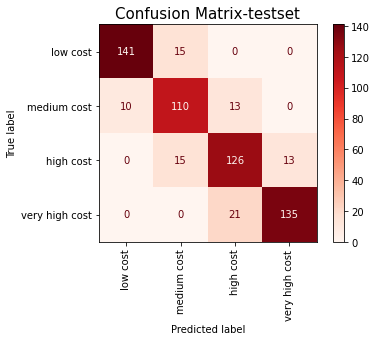




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       156
         1.0       0.79      0.83      0.81       133
         2.0       0.79      0.82      0.80       154
         3.0       0.91      0.87      0.89       156

    accuracy                           0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.86      0.85      0.86       599




 ROC Curve :



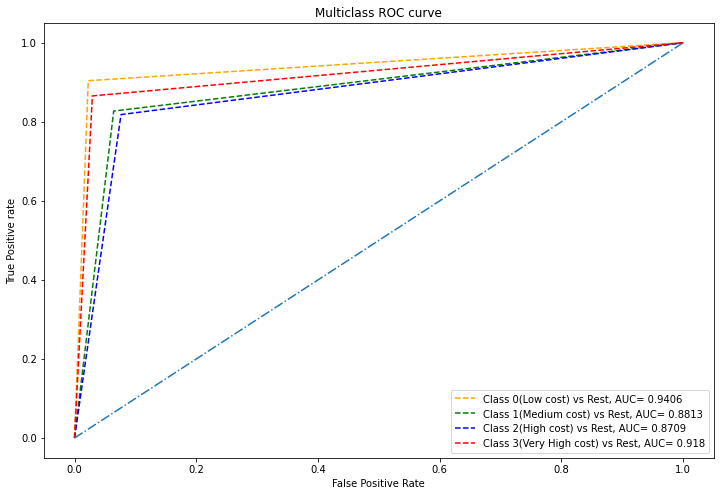

In [91]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=dt_class,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [92]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'DecisionTreeClassifier ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                    KNN classifier                  0.731   
1  KNN classifier with GridSearchCv                  0.776   
2            DecisionTreeClassifier                  1.000   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855

**Insights:**

Compare to earlier model:
1. Training accuracy is 1 and test accuracy is 0.85 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, hence model is overfitted with the given data, we have have to use some other complex model to improve the accuracy.
3. From ROC curve, medium and high cost phone perform very poor with this data.
4. Average F1-score for test data 0.85, which is also perform poor with this given data.

In [93]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 917 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=154f403539822dfbde4943b4eca4446142c20a55a1b4f626fd932b3d2bf2aed6
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [94]:
from dtreeviz.trees import *
from sklearn.datasets import *

In [95]:
feature=list(mob_df.columns)

In [96]:
plt.figure(figsize=(30,30))
viz = dtreeviz(dt_class, 
               X_train,
               y_train,
               feature_names=feature, 
               class_names=[0,1,2,3],
               orientation='LR')
viz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 2160x2160 with 0 Axes>

### Decision Tree with GridSearchCV

In [97]:
# parameter grid for GridSearchCv
param_grid={'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

# Hyperparameter tuning with the GridSearhCV
dt_class_opt=GridSearchCV(dt_class,param_grid=param_grid,cv=5,scoring='accuracy',verbose=2, n_jobs=-1)

# train the model
dt_class_opt.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [3, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [98]:
# getting best parameter
dt_class_opt.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}




 Accuracy score for train set and test set:

Train Set Accuracy: 0.9699140401146131
Test Set Accuracy: 0.8464106844741235



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


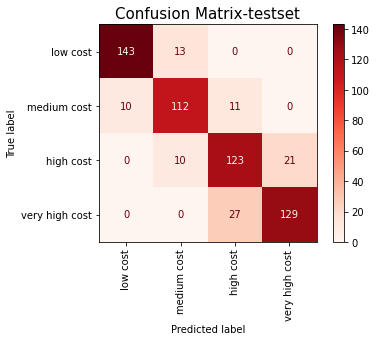




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       343
         1.0       0.95      0.96      0.96       366
         2.0       0.96      0.95      0.95       345
         3.0       0.98      0.99      0.99       342

    accuracy                           0.97      1396
   macro avg       0.97      0.97      0.97      1396
weighted avg       0.97      0.97      0.97      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       156
         1.0       0.83      0.84      0.84       133
         2.0       0.76      0.80      0.78       154
         3.0       0.86      0.83      0.84       156

    accuracy                           0.85       599
   macro avg       0.85      0.85      0.85       599
weighted avg       0.85      0.85      0.85       599




 ROC Curve :



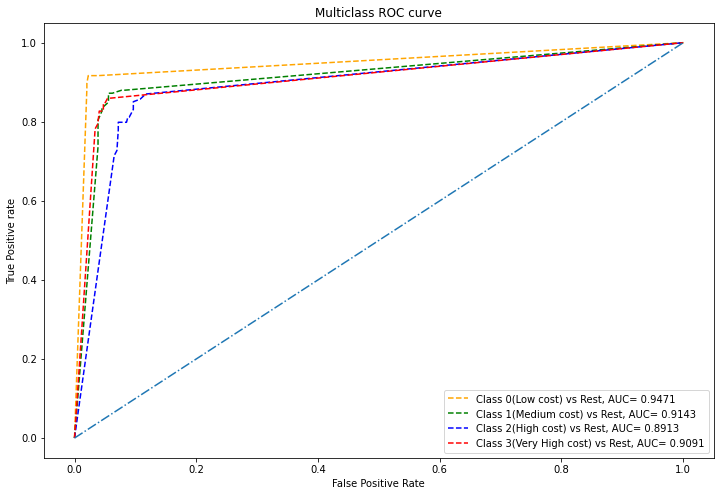

In [99]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=dt_class_opt,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [100]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'DecisionTreeClassifier with GridSearchCV ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                            KNN classifier                  0.731   
1          KNN classifier with GridSearchCv                  0.776   
2                    DecisionTreeClassifier                  1.000   
3  DecisionTreeClassifier with GridSearchCV                  0.970   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846

**Insights:**

Compare to earlier model:
1. Training accuracy is 0.97 and test accuracy is 0.84 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is tain with some percentage of overfitting but we have have to use some other complex model to reduce this overfitting.
3. From ROC curve, low cost phone have high area under curve as compare other three phone.
4. Average F1-score for test data 0.85, which is also perform poor with this given data.

## Random Forest Classifier

In [101]:
# creating an object of the classifier.
randm_frst=RandomForestClassifier()

# training the model.
randm_frst.fit(X_train,y_train)

RandomForestClassifier()




 Accuracy score for train set and test set:

Train Set Accuracy: 1.0
Test Set Accuracy: 0.8998330550918197



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


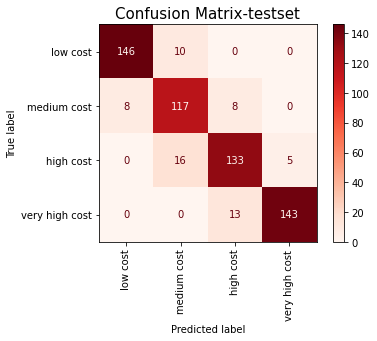




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       156
         1.0       0.82      0.88      0.85       133
         2.0       0.86      0.86      0.86       154
         3.0       0.97      0.92      0.94       156

    accuracy                           0.90       599
   macro avg       0.90      0.90      0.90       599
weighted avg       0.90      0.90      0.90       599




 ROC Curve :



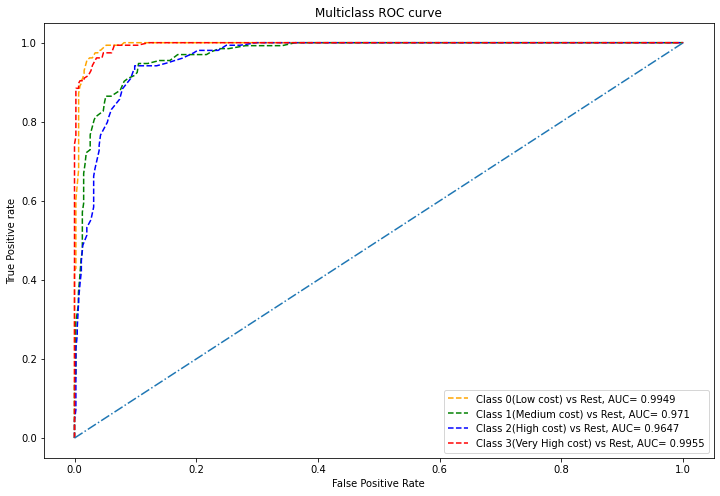

In [102]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=randm_frst,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [103]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'RandomForest Classifier  ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                            KNN classifier                  0.731   
1          KNN classifier with GridSearchCv                  0.776   
2                    DecisionTreeClassifier                  1.000   
3  DecisionTreeClassifier with GridSearchCV                  0.970   
4                  RandomForest Classifier                   1.000   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900

**Insights:**

Compare to earlier model:
1. Training accuracy is 1 and test accuracy is 0.8898 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is tain with some percentage of overfitting but we have have to use some other complex model to reduce this overfitting.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data is equal to 0.89.

### Random Forest Classifier with GridSearchCV

In [107]:
# parameter grid for GridSearchCv
param_grid = {'n_estimators':[300,500,700],
          'max_depth':[None,10,20,30,40],
          'max_features':['sqrt',4,'log2','auto'],
          'min_samples_split':[2,4,6],
          'max_leaf_nodes':[None, 20, 40],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          }

In [108]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with the GridSearhCV
randm_frst_opt = GridSearchCV(estimator = randm_frst, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [110]:
# train the model
randm_frst_opt.fit(X_train,y_train)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [300, 500, 700]},
             verbose=2)

In [111]:
# getting best parameter
randm_frst_opt.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}




 Accuracy score for train set and test set:

Train Set Accuracy: 1.0
Test Set Accuracy: 0.8848080133555927



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


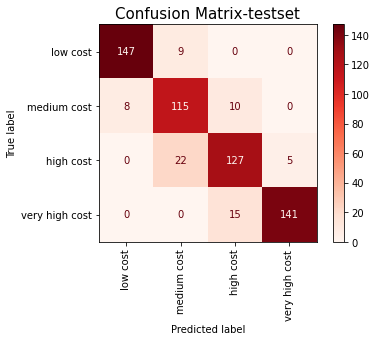




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       156
         1.0       0.79      0.86      0.82       133
         2.0       0.84      0.82      0.83       154
         3.0       0.97      0.90      0.93       156

    accuracy                           0.88       599
   macro avg       0.88      0.88      0.88       599
weighted avg       0.89      0.88      0.89       599




 ROC Curve :



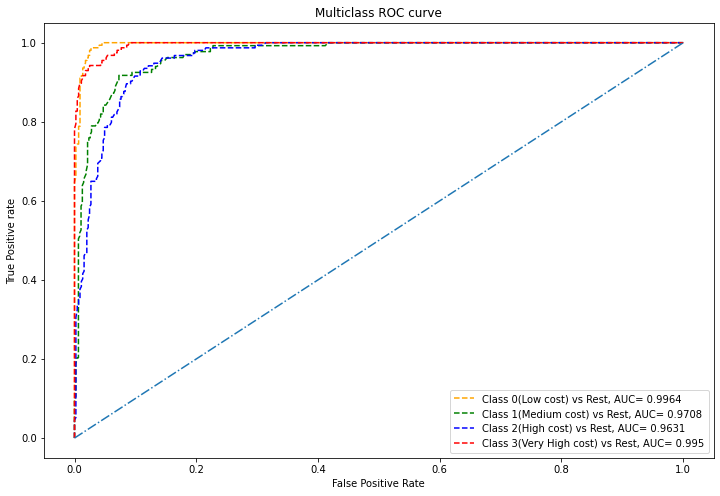

In [112]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=randm_frst_opt,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [113]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'RandomForest Classifier with GridSearchCV ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                             KNN classifier                  0.731   
1           KNN classifier with GridSearchCv                  0.776   
2                     DecisionTreeClassifier                  1.000   
3   DecisionTreeClassifier with GridSearchCV                  0.970   
4                   RandomForest Classifier                   1.000   
5  RandomForest Classifier with GridSearchCV                  1.000   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900  
5                0.885

**Insights:**

Compare to earlier model:
1. Training accuracy is 1 and test accuracy is 0.89 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is train with some percentage of overfitting but we have have to use some other complex model to reduce this overfitting.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data 0.90, which is also needs improvement.Hence, we have to play with some other model.

## Gradient boost

In [114]:
# creating an object of the classifier
grad_boost=GradientBoostingClassifier()

# train the model
grad_boost.fit(X_train,y_train)

GradientBoostingClassifier()




 Accuracy score for train set and test set:

Train Set Accuracy: 1.0
Test Set Accuracy: 0.9115191986644408



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


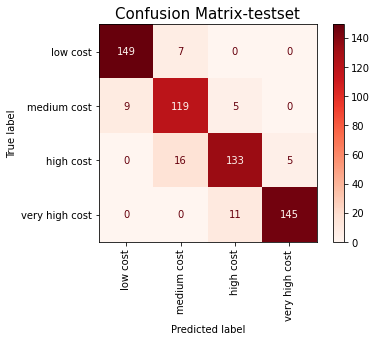




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       156
         1.0       0.84      0.89      0.87       133
         2.0       0.89      0.86      0.88       154
         3.0       0.97      0.93      0.95       156

    accuracy                           0.91       599
   macro avg       0.91      0.91      0.91       599
weighted avg       0.91      0.91      0.91       599




 ROC Curve :



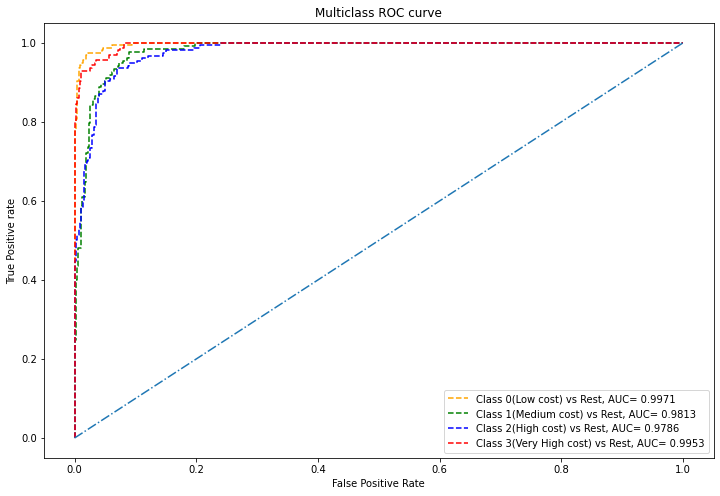

In [115]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=grad_boost,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [116]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'GradientBoostingClassifier ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                             KNN classifier                  0.731   
1           KNN classifier with GridSearchCv                  0.776   
2                     DecisionTreeClassifier                  1.000   
3   DecisionTreeClassifier with GridSearchCV                  0.970   
4                   RandomForest Classifier                   1.000   
5  RandomForest Classifier with GridSearchCV                  1.000   
6                 GradientBoostingClassifier                  1.000   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900  
5                0.885  
6                0.912

**Insights:**

Compare to earlier model:
1. Training accuracy is 1 and test accuracy is 0.90 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is train with some percentage of overfitting but we have have to use some other complex model to reduce this overfitting.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data 0.91, which is also needs improvement.Hence, we have to play with some other model.

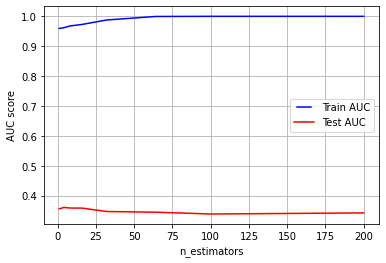

In [117]:
# finding n_estimator for AUC curve
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=3)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b' , label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

plt.grid()
plt.show()

### Gradient boost with GridSearchCV

In [118]:
# parameter grid for GridSearchCv
param_grid={'learning_rate':[0.05,0.1,0.15],
             'min_samples_split':[6,10,14],
             'n_estimators': [20],
             'max_depth':[3,5,7,9],     
             }

In [119]:
# Hyperparameter tuning with the GridSearhCV
grad_boost_opt = GridSearchCV(grad_boost, param_grid, cv=5, n_jobs=-1)

# train the model
grad_boost_opt.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [6, 10, 14],
                         'n_estimators': [20]})

In [120]:
# getting best parameter
grad_boost_opt.best_params_

{'learning_rate': 0.15,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 20}




 Accuracy score for train set and test set:

Train Set Accuracy: 0.9992836676217765
Test Set Accuracy: 0.991652754590985



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


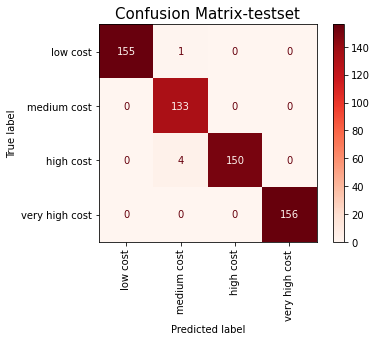




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       156
         1.0       0.96      1.00      0.98       133
         2.0       1.00      0.97      0.99       154
         3.0       1.00      1.00      1.00       156

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599




 ROC Curve :



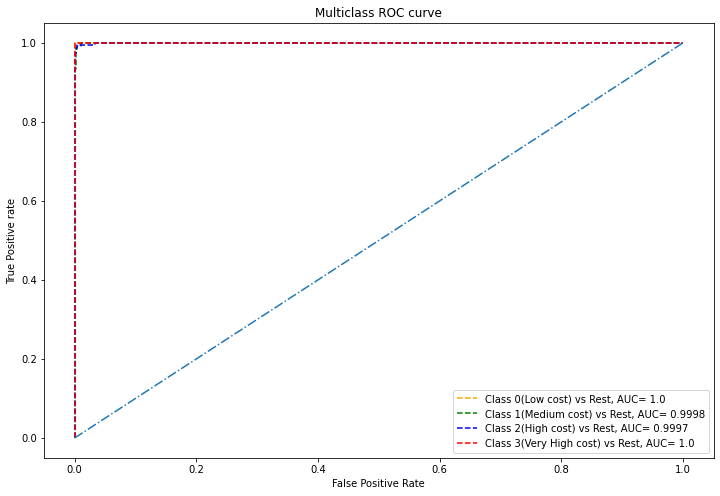

In [121]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=grad_boost_opt,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [122]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'GradientBoostingClassifier with GridSearchCV ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                                KNN classifier                  0.731   
1              KNN classifier with GridSearchCv                  0.776   
2                        DecisionTreeClassifier                  1.000   
3      DecisionTreeClassifier with GridSearchCV                  0.970   
4                      RandomForest Classifier                   1.000   
5     RandomForest Classifier with GridSearchCV                  1.000   
6                    GradientBoostingClassifier                  1.000   
7  GradientBoostingClassifier with GridSearchCV                  0.999   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900  
5                0.885  
6                0.912  
7                0.992

**Insights:**

Compare to earlier model:
1. Training accuracy is 0.99 and test accuracy is 0.99 indicate that model is train with the given data very well.
2. From ROC curve, almost all class of phone overlap each other and it is closer to 1.
3. Average F1-score for test data 0.99. we have to play with some other model.

## Xg boost

In [123]:
# creating an object of the classifier.
xg_boost=XGBClassifier()

# train the model
xg_boost.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')




 Accuracy score for train set and test set:

Train Set Accuracy: 0.9878223495702005
Test Set Accuracy: 0.9048414023372288



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


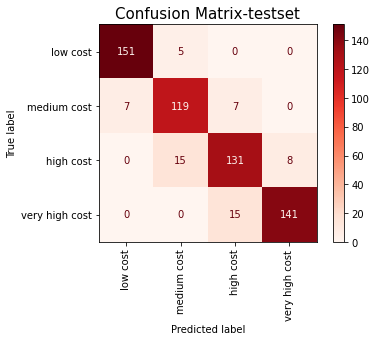




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       343
         1.0       0.98      0.98      0.98       366
         2.0       0.98      0.98      0.98       345
         3.0       1.00      0.99      0.99       342

    accuracy                           0.99      1396
   macro avg       0.99      0.99      0.99      1396
weighted avg       0.99      0.99      0.99      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       156
         1.0       0.86      0.89      0.87       133
         2.0       0.86      0.85      0.85       154
         3.0       0.95      0.90      0.92       156

    accuracy                           0.90       599
   macro avg       0.90      0.90      0.90       599
weighted avg       0.91      0.90      0.90       599




 ROC Curve :



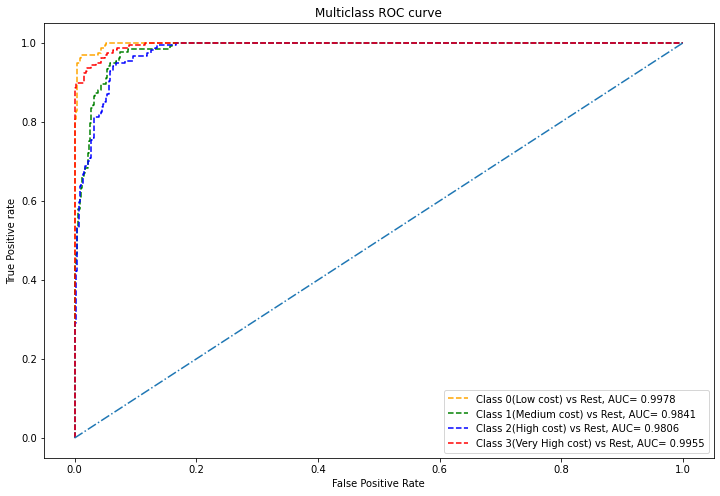

In [124]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=xg_boost,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [125]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'Xg boost',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                                KNN classifier                  0.731   
1              KNN classifier with GridSearchCv                  0.776   
2                        DecisionTreeClassifier                  1.000   
3      DecisionTreeClassifier with GridSearchCV                  0.970   
4                      RandomForest Classifier                   1.000   
5     RandomForest Classifier with GridSearchCV                  1.000   
6                    GradientBoostingClassifier                  1.000   
7  GradientBoostingClassifier with GridSearchCV                  0.999   
8                                       Xg boost                 0.988   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900  
5                0.885  
6                0.912  
7                0.992  
8                0.905

**Insights:**

1. Training accuracy is 0.98 and test accuracy is 0.90 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is train with some percentage of overfitting but we have have to search other algorithm to reduce this overfitting.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data 0.90, which is more than earlier model.

### Xg boost with GridSearchCV

In [126]:
# parameter grid for GridSearchCv
param_grid={
          'learning_rate':[.01,.05,.1,1],
          'n_estimators':[500,1000],
          'gamma':[0.2],
          'subsample':[0.5,0.6]
          }

In [127]:
# Hyperparameter tuning with the GridSearhCV
xg_boost_opt = GridSearchCV(xg_boost, param_grid, cv=5,verbose=2, n_jobs=-1)

# train the model
xg_boost_opt.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [500, 1000], 'subsample': [0.5, 0.6]},
             verbose=2)

In [128]:
# getting best parameter
xg_boost_opt.best_params_

{'gamma': 0.2, 'learning_rate': 0.05, 'n_estimators': 500, 'subsample': 0.5}




 Accuracy score for train set and test set:

Train Set Accuracy: 1.0
Test Set Accuracy: 0.9332220367278798



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


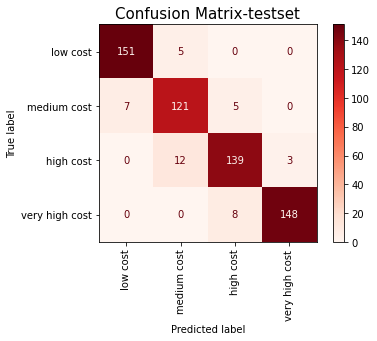




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       366
         2.0       1.00      1.00      1.00       345
         3.0       1.00      1.00      1.00       342

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       156
         1.0       0.88      0.91      0.89       133
         2.0       0.91      0.90      0.91       154
         3.0       0.98      0.95      0.96       156

    accuracy                           0.93       599
   macro avg       0.93      0.93      0.93       599
weighted avg       0.93      0.93      0.93       599




 ROC Curve :



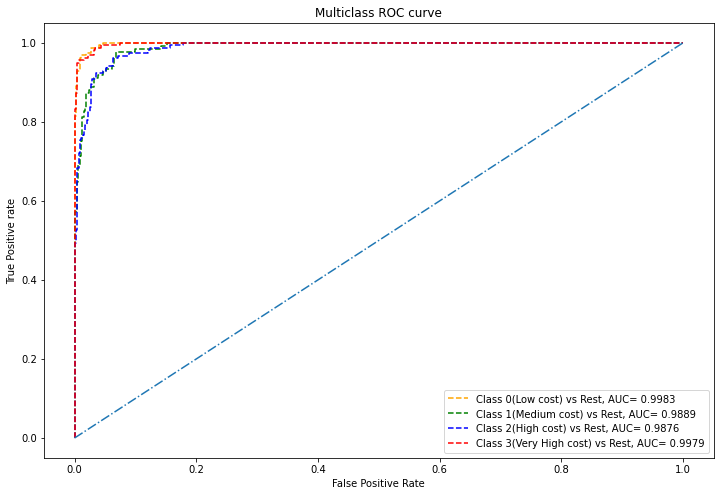

In [129]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=xg_boost_opt,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [130]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'Xg boost with GridSearchCV',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                                KNN classifier                  0.731   
1              KNN classifier with GridSearchCv                  0.776   
2                        DecisionTreeClassifier                  1.000   
3      DecisionTreeClassifier with GridSearchCV                  0.970   
4                      RandomForest Classifier                   1.000   
5     RandomForest Classifier with GridSearchCV                  1.000   
6                    GradientBoostingClassifier                  1.000   
7  GradientBoostingClassifier with GridSearchCV                  0.999   
8                                       Xg boost                 0.988   
9                     Xg boost with GridSearchCV                 1.000   

   test Accuracy Score  
0                0.559  
1                0.735  
2                0.855  
3                0.846  
4                0.900  
5                0.885  
6                0.912  
7                0.992  
8                0.905  
9                0.933

**Insights:**

1. Training accuracy is 1 and test accuracy is 0.93 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is train with some percentage of overfitting but we have search other algorithm to reduce this overfitting.
3. From ROC curve, all the classes of phone overlap each other.
4. Average F1-score for test data 0.93, which is more than earlier model.

## Support Vector Machine Classifier

In [131]:
# Applying the Support Vector Machine
from sklearn.svm import SVC

# creating an object of the classifier.
svc = SVC(probability=True)

# train the model
svc.fit(X_train_scaled, y_train)

SVC(probability=True)




 Accuracy score for train set and test set:

Train Set Accuracy: 0.9842406876790831
Test Set Accuracy: 0.8881469115191987



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


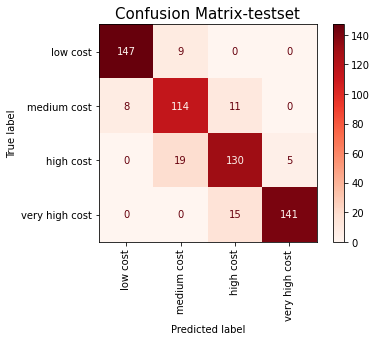




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       343
         1.0       0.97      0.99      0.98       366
         2.0       0.97      0.97      0.97       345
         3.0       0.99      0.98      0.99       342

    accuracy                           0.98      1396
   macro avg       0.98      0.98      0.98      1396
weighted avg       0.98      0.98      0.98      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       156
         1.0       0.80      0.86      0.83       133
         2.0       0.83      0.84      0.84       154
         3.0       0.97      0.90      0.93       156

    accuracy                           0.89       599
   macro avg       0.89      0.89      0.89       599
weighted avg       0.89      0.89      0.89       599




 ROC Curve :



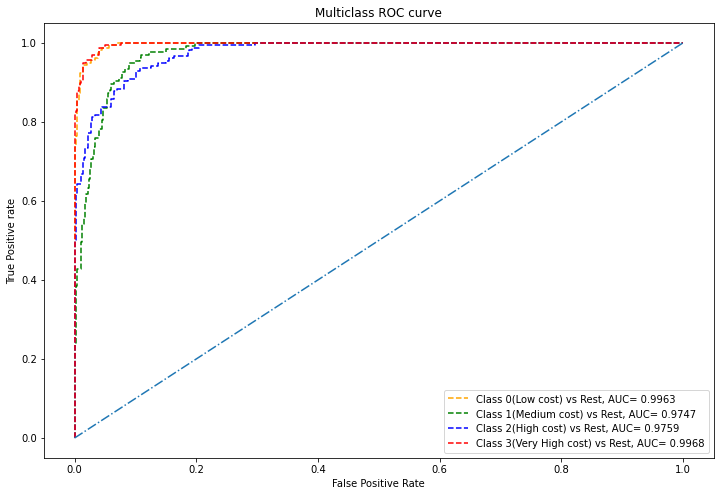

In [132]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=svc,X_train=X_train_scaled,y_train=y_train,X_test=X_test_scaled,y_test=y_test)

In [133]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'SVC ',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                                 KNN classifier                  0.731   
1               KNN classifier with GridSearchCv                  0.776   
2                         DecisionTreeClassifier                  1.000   
3       DecisionTreeClassifier with GridSearchCV                  0.970   
4                       RandomForest Classifier                   1.000   
5      RandomForest Classifier with GridSearchCV                  1.000   
6                     GradientBoostingClassifier                  1.000   
7   GradientBoostingClassifier with GridSearchCV                  0.999   
8                                        Xg boost                 0.988   
9                      Xg boost with GridSearchCV                 1.000   
10                                           SVC                  0.984   

    test Accuracy Score  
0                 0.559  
1                 0.735  
2                 0.855  
3                 0.846  
4                 0.900  
5                 0.885  
6                 0.912  
7                 0.992  
8                 0.905  
9                 0.933  
10                0.888

**Insights:**

1. Training accuracy is 0.98 and test accuracy is 0.88 indicate that model is train with the given data very well.
2. Training accuracy is more than test accuracy, difference between them is large, hence model is train with some percentage of overfitting but we have have to search optimum parameter using hyperparameter tuning to reduce this overfitting.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data 0.89, which is more than earlier model.


### Support Vector Machine with GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV
# parameter grid for GridSearchCv
param_grid= [{'C': [0.01,0.1,1, 10], 'kernel': ['linear'], 'degree' : [1,3,5,7],},
              {'C': [0.01,0.1,1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'degree' : [1,3,5,7],}]

# creating an object for classifier
svm  = SVC (probability=True)

# Hyperparameter tuning with the GridSearhCV
svm_opt = GridSearchCV(svm, param_grid, cv = 5,verbose=2, n_jobs=-1)

# fitting the data into the model
svm_opt.fit(X_train_scaled,y_train)     

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=2)

In [135]:
# getting best parameter
svm_opt.best_params_

{'C': 10, 'degree': 1, 'kernel': 'linear'}




 Accuracy score for train set and test set:

Train Set Accuracy: 0.9835243553008596
Test Set Accuracy: 0.9616026711185309



 plotting confusion matrix for test set:



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


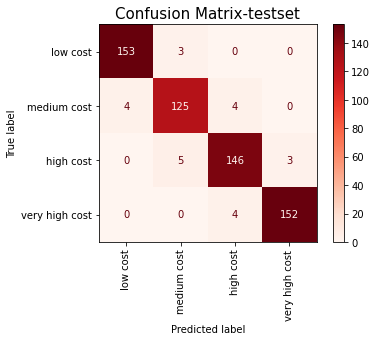




 The classifiaction report of train set:

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       343
         1.0       0.98      0.98      0.98       366
         2.0       0.98      0.97      0.97       345
         3.0       0.99      0.99      0.99       342

    accuracy                           0.98      1396
   macro avg       0.98      0.98      0.98      1396
weighted avg       0.98      0.98      0.98      1396




 The classifiaction report of test set:

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       156
         1.0       0.94      0.94      0.94       133
         2.0       0.95      0.95      0.95       154
         3.0       0.98      0.97      0.98       156

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599




 ROC Curve :



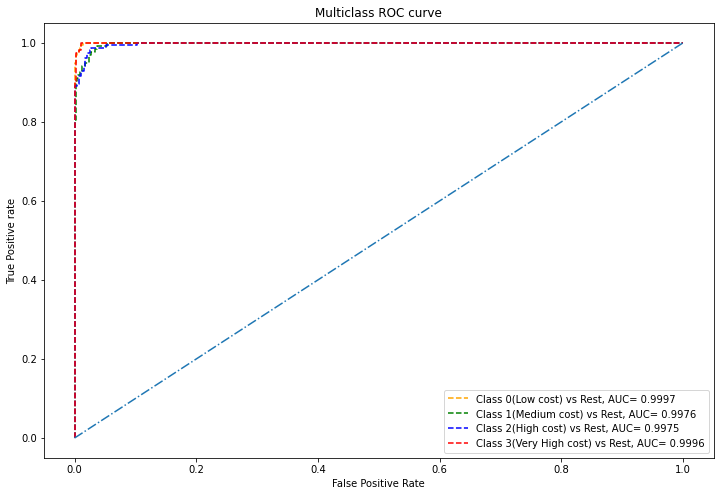

In [136]:
# displaying accuracy score, confusion matrix,classification report and ROC curve
report(model=svm_opt,X_train=X_train_scaled,y_train=y_train,X_test=X_test_scaled,y_test=y_test)

In [137]:
# storing the test set metrics value in a dataframe for later comparison
accuracy_dict={'Model':'SVC with GridSearchCV',
       'train Accuracy Score':round((report.train_accuracy),3),
       'test Accuracy Score':round((report.test_accuracy),3)
       
       }
accuracy_df=accuracy_df.append(accuracy_dict,ignore_index=True)
accuracy_df

Model  train Accuracy Score  \
0                                 KNN classifier                  0.731   
1               KNN classifier with GridSearchCv                  0.776   
2                         DecisionTreeClassifier                  1.000   
3       DecisionTreeClassifier with GridSearchCV                  0.970   
4                       RandomForest Classifier                   1.000   
5      RandomForest Classifier with GridSearchCV                  1.000   
6                     GradientBoostingClassifier                  1.000   
7   GradientBoostingClassifier with GridSearchCV                  0.999   
8                                        Xg boost                 0.988   
9                      Xg boost with GridSearchCV                 1.000   
10                                           SVC                  0.984   
11                          SVC with GridSearchCV                 0.984   

    test Accuracy Score  
0                 0.559  
1                 0.735  
2                 0.855  
3                 0.846  
4                 0.900  
5                 0.885  
6                 0.912  
7                 0.992  
8                 0.905  
9                 0.933  
10                0.888  
11                0.962

**Insights:**

Compare to earlier model:
1. Training accuracy is 0.98 and test accuracy is 0.96 indicate that model is train with the given data very well.
2. Training accuracy is is almost equal to test accuracy, difference between them is so small that it can be neglected, hence model is generalized very well with the given data.
3. From ROC curve, low cost and very high cost phone have high area under curve as compare other two phone.
4. Average F1-score for test data 0.96, which is more than earlier model.

Hence, we can deploy this model.

## Conclusions

In [138]:
accuracy_df

Model  train Accuracy Score  \
0                                 KNN classifier                  0.731   
1               KNN classifier with GridSearchCv                  0.776   
2                         DecisionTreeClassifier                  1.000   
3       DecisionTreeClassifier with GridSearchCV                  0.970   
4                       RandomForest Classifier                   1.000   
5      RandomForest Classifier with GridSearchCV                  1.000   
6                     GradientBoostingClassifier                  1.000   
7   GradientBoostingClassifier with GridSearchCV                  0.999   
8                                        Xg boost                 0.988   
9                      Xg boost with GridSearchCV                 1.000   
10                                           SVC                  0.984   
11                          SVC with GridSearchCV                 0.984   

    test Accuracy Score  
0                 0.559  
1                 0.735  
2                 0.855  
3                 0.846  
4                 0.900  
5                 0.885  
6                 0.912  
7                 0.992  
8                 0.905  
9                 0.933  
10                0.888  
11                0.962

**Conclusions:**

* Total number of mobile phones are equally distributed among all the given price range; hence we can say that it is a balance dataset.
* Ram size, battery power, px_height and px_width increases with increase in price range.
* All the 4g mobile phone also have 3g features.
* 52% of mobile phone have 3g and 4g features
* 23.87% mobile phone have neither 3g nor 4g feature.
* For high and very high price range phone, Single sim mobile phone is more popular.
* Low price range phones and very high price range phones have a high area under the curve compared to the other two classes of the price range, which means that a true positive rate is very as compared to a true negative rate.
* KNN with or without GridSearchCV show poor accuracy score as compare to other model.
* GradientBoostingClassifier with GridSearchCV have test accuracy score is 0.992 and train accuracy score is 0.999, which is best among all the model. Hence we can deploy this model.
* SVC with GridSearchCV having train accuracy score is 0.984 and test accuracy score is 0.962 which is good performer after GradientBoostingClassifier with GridSearchCV
